In [ ]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_rows', None)

def resumetable(df):
    print(f'Dataset Shape: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name', 'dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Missing percent'] = df.isnull().sum().values/len(train)
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    return summary

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/train.csv")
test = pd.read_csv("/content/drive/MyDrive/test.csv")

In [ ]:
#B
train.columns = [col.replace('?', 'Θ') for col in train.columns]
train.columns = [col.replace(' ', '_') for col in train.columns]
test.columns = [col.replace(' ', '_') for col in test.columns]
for col in train.columns:
    if len(train[col].unique()) in [0,1]:
        train.drop(col,inplace=True,axis=1)
        test.drop(col,inplace=True,axis=1)

In [ ]:
#C
nullcolumn = train.columns[train.isnull().sum()>=29000]
train.drop(nullcolumn[1:],inplace=True,axis=1)
test.drop(nullcolumn[1:],inplace=True,axis=1)

In [ ]:
wrongcolumns = train.columns[train.isnull().sum()>0]
for i in wrongcolumns:
  if i not in nullcolumn:
    train.drop(i,inplace=True,axis=1)
    test.drop(i,inplace=True,axis=1)

In [ ]:
def find_equal_columns(df):
    equal_column_pairs = []

    columns = df.columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]

            # 두 칼럼의 값이 모두 같은지 확인
            if df[col1].equals(df[col2]):
                equal_column_pairs.append((col1, col2))

    return equal_column_pairs

# 칼럼 쌍 중에서 각 칼럼을 한번만 남기도록 필터링
def remove_duplicate_columns(df):
    pairs = find_equal_columns(df)
    selected_columns = set()
    columns_to_drop = set()

    for col1, col2 in pairs:
        if col1 not in selected_columns and col2 not in selected_columns:
            # 두 칼럼 중 하나만 선택하고 나머지 칼럼은 제거 대상으로 설정
            columns_to_drop.add(col2)
            selected_columns.add(col1)



    # 선택된 칼럼만 남기고 나머지 칼럼 제거
    cleaned_df = df.drop(columns=columns_to_drop)

    return cleaned_df, columns_to_drop

# 실행
train, dropped_columns = remove_duplicate_columns(train)
test = test.drop(columns = dropped_columns)
# 결과 출력
print("DataFrame with duplicate columns removed:")

print("\nDropped columns:")
print(dropped_columns)

DataFrame with duplicate columns removed:

Dropped columns:
{'Model.Suffix_Fill2', 'Workorder_Fill1', 'Head_Purge_Position_Y_Collect_Result_Fill2', 'Stage3_Line3_Distance_Speed_Collect_Result_Dam', 'CURE_START_POSITION_Θ_Collect_Result_Dam', 'Head_Purge_Position_Y_Collect_Result_Fill1', 'Stage1_Circle4_Distance_Speed_Collect_Result_Dam', 'Workorder_AutoClave', 'Stage3_Circle3_Distance_Speed_Collect_Result_Dam', 'Stage1_Line3_Distance_Speed_Collect_Result_Dam', 'Stage2_Line1_Distance_Speed_Collect_Result_Dam', 'Head_Purge_Position_Y_Collect_Result_Dam', 'Model.Suffix_Fill1', 'CURE_START_POSITION_Z_Collect_Result_Fill2', 'HEAD_NORMAL_COORDINATE_Z_AXIS(Stage3)_Collect_Result_Fill2', 'Workorder_Fill2', 'Stage1_Circle3_Distance_Speed_Collect_Result_Dam', 'HEAD_NORMAL_COORDINATE_Z_AXIS(Stage3)_Collect_Result_Dam', 'Stage2_Circle4_Distance_Speed_Collect_Result_Dam', 'Model.Suffix_AutoClave', 'Stage3_Circle4_Distance_Speed_Collect_Result_Dam', 'Stage2_Circle3_Distance_Speed_Collect_Result_Dam'

In [ ]:
print(len({'Stage2_Circle4_Distance_Speed_Collect_Result_Dam', 'Workorder_Fill2', 'Head_Purge_Position_Y_Collect_Result_Fill2', 'Workorder_AutoClave', 'Stage3_Circle4_Distance_Speed_Collect_Result_Dam', 'Stage3_Circle3_Distance_Speed_Collect_Result_Dam', 'HEAD_NORMAL_COORDINATE_Z_AXIS(Stage3)_Collect_Result_Dam', 'Stage1_Circle4_Distance_Speed_Collect_Result_Dam', 'Stage1_Line3_Distance_Speed_Collect_Result_Dam', 'Workorder_Fill1', 'HEAD_NORMAL_COORDINATE_Z_AXIS(Stage3)_Collect_Result_Fill2', 'Head_Purge_Position_Y_Collect_Result_Dam', 'Stage2_Line1_Distance_Speed_Collect_Result_Dam', 'Head_Purge_Position_Y_Collect_Result_Fill1', 'CURE_START_POSITION_Θ_Collect_Result_Dam', 'Model.Suffix_AutoClave', 'Stage2_Circle3_Distance_Speed_Collect_Result_Dam', 'Model.Suffix_Fill2', 'Stage1_Circle3_Distance_Speed_Collect_Result_Dam', 'CURE_START_POSITION_Z_Collect_Result_Fill2', 'Stage3_Line3_Distance_Speed_Collect_Result_Dam', 'Model.Suffix_Fill1'}))

22


In [ ]:
print(len(dropped_columns))

22


In [ ]:
train.fillna("NAN", inplace=True)
test.fillna("NAN", inplace=True)

<ipython-input-147-92fb79a44238>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NAN' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test.fillna("NAN", inplace=True)


In [ ]:
#OK 변환 후 상수화 -> 안한다
# wrongcolumns = train.columns[train.isnull().sum()>0 and train.isnull.sum()<20000]

# for col in wrongcolumns:
#   if col not in nullcolumn:
#     train.loc[train[col] == 'OK', col] = np.nan
#     test.loc[test[col] == 'OK', col] = np.nan
# train.fillna(0, inplace=True)
# test.fillna(0, inplace=True)
# for i in wrongcolumns:
#   if i not in nullcolumn:
#     train[i] = train[i].astype(float)
#     test[i] = test[i].astype(float)
# for col in wrongcolumns:
#   if col not in nullcolumn:
#     #non_zero_mean = train.loc[train[col] != 0, col].mean()
#     train[col] = train[col].replace(0, non_zero_mean)


In [ ]:
# # z-score 방법을 사용하여 이상치 탐지 및 정보 출력
# from scipy import stats
# def describe_outliers(df):
#     result = {}
#     for column in df.columns:
#         # object 타입이 아닌 int 또는 float64 타입의 컬럼만 처리
#         if not pd.api.types.is_object_dtype(df[column]) and (pd.api.types.is_integer_dtype(df[column]) or pd.api.types.is_float_dtype(df[column])):
#             # 평균 및 표준편차 계산
#             mean = df[column].mean()
#             std_dev = df[column].std()

#             # z-score 계산
#             z_scores = stats.zscore(df[column])
#             abs_z_scores = abs(z_scores)

#             # 이상치 기준 설정 (z-score > 3)
#             threshold = 3
#             outliers = df[abs_z_scores > threshold]
#             outlier_count = outliers.shape[0]

#             # 결과 저장
#             result[column] = {
#                 'mean': mean,
#                 'std_dev': std_dev,
#                 'threshold': threshold,
#                 'outlier_count': outlier_count,
#                 'outliers': outliers[column].tolist()
#             }

#     return result

# # 이상치 및 통계 정보 계산
# outlier_info = describe_outliers(train)

# # 결과 출력
# for column, stats in outlier_info.items():
#   if stats['outlier_count'] > 0:
#     print(f"Column '{column}':")
#     print(f"  Mean: {stats['mean']:.2f}")
#     print(f"  Std Dev: {stats['std_dev']:.2f}")
#     print(f"  z-score Threshold: {stats['threshold']}")
#     print(f"  Number of Outliers: {stats['outlier_count']}")
#     if stats['outlier_count'] > 0:
#         print(f"  Outliers: {stats['outliers']}")
#     print()

In [ ]:
def extract_features(model_str):
    # 기본 변수를 추출
    part1 = model_str.split('-')[0]  # "4F1XA938"
    part2 = model_str.split('-')[1]  # "1"

    # 추출된 문자열의 서브스트링을 생성
    feature1 = part1[0]                # "4"
    #feature2 = part1[1:3]              # "F1"
    feature3 = part1[:3]               # "4F1"
    feature4 = part1[3:]               # "A938"
    #feature5 = part1[-3:]              # "938"
    feature6 = part2                   # "1"

    return pd.Series([feature1, feature3, feature4, feature6])

# train[['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']] = train['Model ID'].apply(extract_features)
# test[['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']] = test['Model ID'].apply(extract_features)

In [ ]:
workorder = []
for col in train.columns:
  if "Workorder" in col:
    workorder.append(col)

print(workorder)
# train[['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']] = train[workorder[0]].apply(extract_features)
# test[['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6']] = test[workorder[0]].apply(extract_features)
# train[['feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12']] = train[workorder[1]].apply(extract_features)
# test[['feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12']] = test[workorder[1]].apply(extract_features)
# train[['feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18']] = train[workorder[2]].apply(extract_features)
# test[['feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18']] = test[workorder[2]].apply(extract_features)
# train[['feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24']] = train[workorder[3]].apply(extract_features)
# test[['feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24']] = test[workorder[3]].apply(extract_features)
train[['feature1', 'feature3', 'feature4', 'feature6']] = train[workorder[0]].apply(extract_features)
test[['feature1', 'feature3', 'feature4', 'feature6']] = test[workorder[0]].apply(extract_features)
# train[['feature7', 'feature9', 'feature10',  'feature12']] = train[workorder[1]].apply(extract_features)
# test[['feature7', 'feature9', 'feature10',  'feature12']] = test[workorder[1]].apply(extract_features)
# train[['feature13',  'feature15', 'feature16',  'feature18']] = train[workorder[2]].apply(extract_features)
# test[['feature13',  'feature15', 'feature16',  'feature18']] = test[workorder[2]].apply(extract_features)
# train[['feature19',  'feature21', 'feature22',  'feature24']] = train[workorder[3]].apply(extract_features)
# test[['feature19',  'feature21', 'feature22',  'feature24']] = test[workorder[3]].apply(extract_features)


['Workorder_Dam']


In [ ]:
for i in workorder:
  train.drop(i, inplace=True, axis=1)
  test.drop(i, inplace=True, axis=1)

In [ ]:
for col in train.columns:
  if "feature" in col:
    train.drop(col, inplace=True, axis=1)
    test.drop(col, inplace=True, axis=1)
    print(col)

feature1
feature3
feature4
feature6


In [ ]:
# obj_col=list(train.select_dtypes(include=['object']).columns)

for i in obj_col:
  if "feature" in i:
    obj_col.remove(i)
print(obj_col)

['Equipment_Dam', 'Model.Suffix_Dam', 'HEAD_NORMAL_COORDINATE_X_AXIS(Stage1)_Judge_Value_Dam', 'Equipment_Fill1', 'Equipment_Fill2', 'feature3', 'feature6', 'PalletID_Collect_Result_Damint', 'PalletID_Collect_Result_Fill1int', 'PalletID_Collect_Result_Fill2int']


In [ ]:
# object_columns = train.select_dtypes(include=['object']).columns

# # 2. 변환 가능 여부 확인 및 정수로 변환
# for col in object_columns:
#     try:
#         # 시리즈를 정수형으로 변환
#         train[col] = train[col].astype(int)
#         test[col] = test[col].astype(int)
#         print(f"열 '{col}'을(를) 정수형으로 변환했습니다.")
#     except ValueError:
#         print(f"열 '{col}'은(는) 정수형으로 변환할 수 없습니다.")


In [ ]:
to_drop  = [
  "CURE_START_POSITION_X_Collect_Result_Fill2",
  "CURE_END_POSITION_X_Collect_Result_Fill2",
  "Chamber_Temp._Judge_Value_AutoClave"
]

train = train.drop(columns=to_drop)
test = test.drop(columns = to_drop)

In [ ]:
obj_col=list(train.select_dtypes(include=['object']).columns)
obj_col.remove("target")


print(obj_col)
print(len(obj_col))

['Equipment_Dam', 'Model.Suffix_Dam', 'HEAD_NORMAL_COORDINATE_X_AXIS(Stage1)_Judge_Value_Dam', 'Equipment_Fill1', 'Equipment_Fill2', 'feature1', 'feature3', 'feature4', 'feature6']
9


In [ ]:


for col in train.columns:
  if "Pallet" in col:
    obj_col.append(col+"int")
    train[col+"int"] = train[col].astype(int)
    test[col+"int"] = test[col].astype(int)
    train.drop(col,inplace=True,axis=1)
    test.drop(col,inplace=True,axis=1)

In [ ]:
# for col in train.columns:
#   if "WorkMode" in col:
#     obj_col.append(col+"int")
#     train[col+"int"] = train[col].round().astype(int)
#     test[col+"int"] = test[col].round().astype(int)
#     train.drop(col,inplace=True,axis=1)
#     test.drop(col,inplace=True,axis=1)

In [ ]:
resumetable(train)

Dataset Shape: (40506, 127)


Name   dtypes  Missing  \
0                                        Equipment_Dam   object        0   
1                                     Model.Suffix_Dam   object        0   
2               CURE_END_POSITION_X_Collect_Result_Dam    int64        0   
3               CURE_END_POSITION_Z_Collect_Result_Dam  float64        0   
4               CURE_END_POSITION_Θ_Collect_Result_Dam    int64        0   
5                        CURE_SPEED_Collect_Result_Dam    int64        0   
6             CURE_START_POSITION_X_Collect_Result_Dam    int64        0   
7         DISCHARGED_SPEED_OF_RESIN_Collect_Result_Dam    int64        0   
8    DISCHARGED_TIME_OF_RESIN(Stage1)_Collect_Resul...  float64        0   
9    DISCHARGED_TIME_OF_RESIN(Stage2)_Collect_Resul...  float64        0   
10   DISCHARGED_TIME_OF_RESIN(Stage3)_Collect_Resul...  float64        0   
11          Dispense_Volume(Stage1)_Collect_Result_Dam  float64        0   
12          Dispense_Volume(Stage2)_Collect_Result_Dam  float64        0   
13          Dispense_Volume(Stage3)_Collect_Result_Dam  float64        0   
14   HEAD_NORMAL_COORDINATE_X_AXIS(Stage1)_Judge_Va...   object        0   
15   HEAD_NORMAL_COORDINATE_X_AXIS(Stage2)_Collect_...  float64        0   
16   HEAD_NORMAL_COORDINATE_X_AXIS(Stage3)_Collect_...  float64        0   
17   HEAD_NORMAL_COORDINATE_Y_AXIS(Stage1)_Collect_...  float64        0   
18   HEAD_NORMAL_COORDINATE_Y_AXIS(Stage2)_Collect_...  float64        0   
19   HEAD_NORMAL_COORDINATE_Y_AXIS(Stage3)_Collect_...  float64        0   
20   HEAD_NORMAL_COORDINATE_Z_AXIS(Stage1)_Collect_...  float64        0   
21   HEAD_NORMAL_COORDINATE_Z_AXIS(Stage2)_Collect_...  float64        0   
22          HEAD_Standby_Position_X_Collect_Result_Dam  float64        0   
23          HEAD_Standby_Position_Y_Collect_Result_Dam    int64        0   
24          HEAD_Standby_Position_Z_Collect_Result_Dam    int64        0   
25            Head_Clean_Position_X_Collect_Result_Dam  float64        0   
26            Head_Clean_Position_Y_Collect_Result_Dam  float64        0   
27            Head_Clean_Position_Z_Collect_Result_Dam  float64        0   
28            Head_Purge_Position_X_Collect_Result_Dam  float64        0   
29            Head_Purge_Position_Z_Collect_Result_Dam  float64        0   
30             Head_Zero_Position_X_Collect_Result_Dam  float64        0   
31             Head_Zero_Position_Y_Collect_Result_Dam  float64        0   
32             Head_Zero_Position_Z_Collect_Result_Dam  float64        0   
33                Machine_Tact_time_Collect_Result_Dam  float64        0   
34                   Production_Qty_Collect_Result_Dam    int64        0   
35                        Receip_No_Collect_Result_Dam    int64        0   
36    Stage1_Circle1_Distance_Speed_Collect_Result_Dam    int64        0   
37    Stage1_Circle2_Distance_Speed_Collect_Result_Dam    int64        0   
38      Stage1_Line1_Distance_Speed_Collect_Result_Dam    int64        0   
39      Stage1_Line2_Distance_Speed_Collect_Result_Dam    int64        0   
40      Stage1_Line4_Distance_Speed_Collect_Result_Dam    int64        0   
41    Stage2_Circle1_Distance_Speed_Collect_Result_Dam    int64        0   
42    Stage2_Circle2_Distance_Speed_Collect_Result_Dam    int64        0   
43      Stage2_Line2_Distance_Speed_Collect_Result_Dam    int64        0   
44      Stage2_Line3_Distance_Speed_Collect_Result_Dam    int64        0   
45      Stage2_Line4_Distance_Speed_Collect_Result_Dam    int64        0   
46    Stage3_Circle1_Distance_Speed_Collect_Result_Dam    int64        0   
47    Stage3_Circle2_Distance_Speed_Collect_Result_Dam    int64        0   
48      Stage3_Line1_Distance_Speed_Collect_Result_Dam    int64        0   
49      Stage3_Line2_Distance_Speed_Collect_Result_Dam    int64        0   
50      Stage3_Line4_Distance_Speed_Collect_Result_Dam    int64        0   
51                      THICKNESS_1_Collect_Result_Dam    int64        0   
52                    

In [ ]:
notobj_col = []
for i in train.columns:
  if i not in obj_col:
    notobj_col.append(i)
notobj_col.remove("target")
from sklearn.decomposition import PCA
train_int = train[notobj_col]
test_int = test[notobj_col]
correlation_matrix = train_int.corr()
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            high_corr_pairs.append((colname_i, colname_j))

def find_components(pairs):
    components = []
    seen = set()

    def dfs(node, component):
        stack = [node]
        while stack:
            current = stack.pop()
            if current not in seen:
                seen.add(current)
                component.append(current)
                for a, b in pairs:
                    if current == a and b not in seen:
                        stack.append(b)
                    elif current == b and a not in seen:
                        stack.append(a)

    for pair in pairs:
        if pair[0] not in seen or pair[1] not in seen:
            component = []
            dfs(pair[0], component)
            components.append(component)

    return components

components = find_components(high_corr_pairs)
print(len(components))
for i in components: print(i)


# pca = PCA(n_components=0.95)
# pca_train = pca.fit_transform(train_int)
# pca_test = pca.transform(test_int)




11
['CURE_END_POSITION_Z_Collect_Result_Dam', 'HEAD_NORMAL_COORDINATE_Z_AXIS(Stage2)_Collect_Result_Fill2', 'HEAD_NORMAL_COORDINATE_Y_AXIS(Stage3)_Collect_Result_Fill2', 'HEAD_NORMAL_COORDINATE_Y_AXIS(Stage2)_Collect_Result_Fill2', 'HEAD_NORMAL_COORDINATE_Y_AXIS(Stage3)_Collect_Result_Fill1', 'HEAD_NORMAL_COORDINATE_Y_AXIS(Stage2)_Collect_Result_Fill1', 'HEAD_NORMAL_COORDINATE_Y_AXIS(Stage3)_Collect_Result_Dam', 'HEAD_NORMAL_COORDINATE_Y_AXIS(Stage2)_Collect_Result_Dam', 'CURE_START_POSITION_X_Collect_Result_Dam', 'CURE_END_POSITION_Θ_Collect_Result_Dam', 'CURE_END_POSITION_X_Collect_Result_Dam']
['DISCHARGED_TIME_OF_RESIN(Stage3)_Collect_Result_Dam', 'Stage3_Line4_Distance_Speed_Collect_Result_Dam', 'Stage3_Line2_Distance_Speed_Collect_Result_Dam', 'Stage3_Line1_Distance_Speed_Collect_Result_Dam', 'Stage3_Circle2_Distance_Speed_Collect_Result_Dam', 'Stage3_Circle1_Distance_Speed_Collect_Result_Dam', 'Stage1_Line4_Distance_Speed_Collect_Result_Dam', 'Stage1_Line2_Distance_Speed_Collect

In [ ]:
resumetable(train)

Dataset Shape: (40506, 129)


Name   dtypes  Missing  \
0                                        Equipment_Dam   object        0   
1                                     Model.Suffix_Dam   object        0   
2               CURE_END_POSITION_X_Collect_Result_Dam  float64        0   
3               CURE_END_POSITION_Z_Collect_Result_Dam  float64        0   
4               CURE_END_POSITION_Θ_Collect_Result_Dam  float64        0   
5                        CURE_SPEED_Collect_Result_Dam  float64        0   
6             CURE_START_POSITION_X_Collect_Result_Dam  float64        0   
7         DISCHARGED_SPEED_OF_RESIN_Collect_Result_Dam  float64        0   
8    DISCHARGED_TIME_OF_RESIN(Stage1)_Collect_Resul...  float64        0   
9    DISCHARGED_TIME_OF_RESIN(Stage2)_Collect_Resul...  float64        0   
10   DISCHARGED_TIME_OF_RESIN(Stage3)_Collect_Resul...  float64        0   
11          Dispense_Volume(Stage1)_Collect_Result_Dam  float64        0   
12          Dispense_Volume(Stage2)_Collect_Result_Dam  float64        0   
13          Dispense_Volume(Stage3)_Collect_Result_Dam  float64        0   
14   HEAD_NORMAL_COORDINATE_X_AXIS(Stage1)_Judge_Va...   object        0   
15   HEAD_NORMAL_COORDINATE_X_AXIS(Stage2)_Collect_...  float64        0   
16   HEAD_NORMAL_COORDINATE_X_AXIS(Stage3)_Collect_...  float64        0   
17   HEAD_NORMAL_COORDINATE_Y_AXIS(Stage1)_Collect_...  float64        0   
18   HEAD_NORMAL_COORDINATE_Y_AXIS(Stage2)_Collect_...  float64        0   
19   HEAD_NORMAL_COORDINATE_Y_AXIS(Stage3)_Collect_...  float64        0   
20   HEAD_NORMAL_COORDINATE_Z_AXIS(Stage1)_Collect_...  float64        0   
21   HEAD_NORMAL_COORDINATE_Z_AXIS(Stage2)_Collect_...  float64        0   
22          HEAD_Standby_Position_X_Collect_Result_Dam  float64        0   
23          HEAD_Standby_Position_Y_Collect_Result_Dam  float64        0   
24          HEAD_Standby_Position_Z_Collect_Result_Dam  float64        0   
25            Head_Clean_Position_X_Collect_Result_Dam  float64        0   
26            Head_Clean_Position_Y_Collect_Result_Dam  float64        0   
27            Head_Clean_Position_Z_Collect_Result_Dam  float64        0   
28            Head_Purge_Position_X_Collect_Result_Dam  float64        0   
29            Head_Purge_Position_Z_Collect_Result_Dam  float64        0   
30             Head_Zero_Position_X_Collect_Result_Dam  float64        0   
31             Head_Zero_Position_Y_Collect_Result_Dam  float64        0   
32             Head_Zero_Position_Z_Collect_Result_Dam  float64        0   
33                Machine_Tact_time_Collect_Result_Dam  float64        0   
34                   Production_Qty_Collect_Result_Dam  float64        0   
35                        Receip_No_Collect_Result_Dam  float64        0   
36    Stage1_Circle1_Distance_Speed_Collect_Result_Dam  float64        0   
37    Stage1_Circle2_Distance_Speed_Collect_Result_Dam  float64        0   
38      Stage1_Line1_Distance_Speed_Collect_Result_Dam  float64        0   
39      Stage1_Line2_Distance_Speed_Collect_Result_Dam  float64        0   
40      Stage1_Line4_Distance_Speed_Collect_Result_Dam  float64        0   
41    Stage2_Circle1_Distance_Speed_Collect_Result_Dam  float64        0   
42    Stage2_Circle2_Distance_Speed_Collect_Result_Dam  float64        0   
43      Stage2_Line2_Distance_Speed_Collect_Result_Dam  float64        0   
44      Stage2_Line3_Distance_Speed_Collect_Result_Dam  float64        0   
45      Stage2_Line4_Distance_Speed_Collect_Result_Dam  float64        0   
46    Stage3_Circle1_Distance_Speed_Collect_Result_Dam  float64        0   
47    Stage3_Circle2_Distance_Speed_Collect_Result_Dam  float64        0   
48      Stage3_Line1_Distance_Speed_Collect_Result_Dam  float64        0   
49      Stage3_Line2_Distance_Speed_Collect_Result_Dam  float64        0   
50      Stage3_Line4_Distance_Speed_Collect_Result_Dam  float64        0   
51                      THICKNESS_1_Collect_Result_Dam  float64        0   
52                    

In [ ]:
time_col_dam = []
time_col_auto = []
time_col_fill1= []
for i in train.columns:
  if ("TIME" in i or "time" in i or "Time" in i) and "Machine" not in i:
    if "Dam" in i:
      time_col_dam.append(i)
    elif "AutoClave" in i:
      time_col_auto.append(i)
    elif "Fill1" in i:
      time_col_fill1.append(i)
time_sum_dam = [0]*len(train)
time_sum_auto = [0]*len(train)
time_sum_fill1 = [0]*len(train)
time_sum_dam_test = [0]*len(test)
time_sum_auto_test = [0]*len(test)
time_sum_fill1_test = [0]*len(test)

for i in time_col_dam:
  time_sum_dam += train[i]
  time_sum_dam_test += test[i]
for i in time_col_auto:
  time_sum_auto += train[i]
  time_sum_auto_test += test[i]
for i in time_col_fill1:
  time_sum_fill1 += train[i]
  time_sum_fill1_test += test[i]
train["time_sum_dam"] = time_sum_dam
train["time_sum_auto"] = time_sum_auto
train["time_sum_fill1"] = time_sum_fill1
test["time_sum_dam"] = time_sum_dam_test
test["time_sum_auto"] = time_sum_auto_test
test["time_sum_fill1"] = time_sum_fill1_test



In [ ]:
vol_col_dam = []
vol_col_fill1= []
for i in train.columns:
  if ("Volume" in i):
    if "Dam" in i:
      vol_col_dam.append(i)
    elif "Fill1" in i:
      vol_col_fill1.append(i)
vol_sum_dam = [0]*len(train)
vol_sum_fill1 = [0]*len(train)
vol_sum_dam_test = [0]*len(test)
vol_sum_fill1_test = [0]*len(test)
for i in vol_col_dam:
  vol_sum_dam += train[i]
  vol_sum_dam_test += test[i]
for i in vol_col_fill1:
  vol_sum_fill1 += train[i]
  vol_sum_fill1_test += test[i]
train["vol_sum_dam"] = vol_sum_dam
train["vol_sum_fill1"] = vol_sum_fill1
test["vol_sum_dam"] = vol_sum_dam_test
test["vol_sum_fill1"] = vol_sum_fill1_test



In [ ]:
pres_col = []
pres_unit_col= []
for i in train.columns:
  if ("Pressure" in i):
    if "Unit" in i:
      pres_unit_col.append(i)
    else:
      pres_col.append(i)
pres_sum = [0]*len(train)
pres_sum_test = [0]*len(test)
for i in pres_col:
  pres_sum += train[i]
  pres_sum_test += test[i]
pres_unit_sum = [0]*len(train)
pres_unit_sum_test = [0]*len(test)
for i in pres_unit_col:
  pres_unit_sum += train[i]
  pres_unit_sum_test += test[i]
train["pres_sum"] = pres_sum
train["pres_unit_sum"] = pres_unit_sum
test["pres_sum"] = pres_sum_test
test["pres_unit_sum"] = pres_unit_sum_test

In [ ]:
print(time_col_dam)
print(time_col_auto)
print(time_col_fill1)
print(vol_col_dam)
print(vol_col_fill1)

['DISCHARGED_TIME_OF_RESIN(Stage1)_Collect_Result_Dam', 'DISCHARGED_TIME_OF_RESIN(Stage2)_Collect_Result_Dam', 'DISCHARGED_TIME_OF_RESIN(Stage3)_Collect_Result_Dam']
['1st_Pressure_1st_Pressure_Unit_Time_AutoClave', '2nd_Pressure_Unit_Time_AutoClave', '3rd_Pressure_Unit_Time_AutoClave', 'Chamber_Temp._Unit_Time_AutoClave']
['DISCHARGED_TIME_OF_RESIN(Stage1)_Collect_Result_Fill1', 'DISCHARGED_TIME_OF_RESIN(Stage2)_Collect_Result_Fill1', 'DISCHARGED_TIME_OF_RESIN(Stage3)_Collect_Result_Fill1']
['Dispense_Volume(Stage1)_Collect_Result_Dam', 'Dispense_Volume(Stage2)_Collect_Result_Dam', 'Dispense_Volume(Stage3)_Collect_Result_Dam']
['Dispense_Volume(Stage1)_Collect_Result_Fill1', 'Dispense_Volume(Stage2)_Collect_Result_Fill1', 'Dispense_Volume(Stage3)_Collect_Result_Fill1']


In [ ]:
#E
notobj_col = []
for i in train.columns:
  if i not in obj_col:
    notobj_col.append(i)
notobj_col.remove("target")
print(notobj_col)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[notobj_col] = scaler.fit_transform(train[notobj_col])
test[notobj_col] = scaler.transform(test[notobj_col])

['CURE_END_POSITION_X_Collect_Result_Dam', 'CURE_END_POSITION_Z_Collect_Result_Dam', 'CURE_END_POSITION_Θ_Collect_Result_Dam', 'CURE_SPEED_Collect_Result_Dam', 'CURE_START_POSITION_X_Collect_Result_Dam', 'DISCHARGED_SPEED_OF_RESIN_Collect_Result_Dam', 'DISCHARGED_TIME_OF_RESIN(Stage1)_Collect_Result_Dam', 'DISCHARGED_TIME_OF_RESIN(Stage2)_Collect_Result_Dam', 'DISCHARGED_TIME_OF_RESIN(Stage3)_Collect_Result_Dam', 'Dispense_Volume(Stage1)_Collect_Result_Dam', 'Dispense_Volume(Stage2)_Collect_Result_Dam', 'Dispense_Volume(Stage3)_Collect_Result_Dam', 'HEAD_NORMAL_COORDINATE_X_AXIS(Stage2)_Collect_Result_Dam', 'HEAD_NORMAL_COORDINATE_X_AXIS(Stage3)_Collect_Result_Dam', 'HEAD_NORMAL_COORDINATE_Y_AXIS(Stage1)_Collect_Result_Dam', 'HEAD_NORMAL_COORDINATE_Y_AXIS(Stage2)_Collect_Result_Dam', 'HEAD_NORMAL_COORDINATE_Y_AXIS(Stage3)_Collect_Result_Dam', 'HEAD_NORMAL_COORDINATE_Z_AXIS(Stage1)_Collect_Result_Dam', 'HEAD_NORMAL_COORDINATE_Z_AXIS(Stage2)_Collect_Result_Dam', 'HEAD_Standby_Position_X_

In [ ]:
pca_results = []
pca_results_test = []
pca_num = 0
for component in components:
    if len(component) > 2:
        pca_num +=1
        # PCA 적용을 위한 데이터 준비
        pca_df = train[component]
        pca_df_test = test[component]
        # PCA 적용
        pca = PCA(n_components=3)  # 주성분으로 축소
        pca_result = pca.fit_transform(pca_df)
        pca_result_test = pca.transform(pca_df_test)

        # PCA 결과를 데이터프레임으로 변환
        pca_df_result = pd.DataFrame(data=pca_result, columns=["PCA_"+str(pca_num*3-2), "PCA_"+str(pca_num*3-1), "PCA_"+str(pca_num*3)])
        pca_results.append(pca_df_result)
        pca_df_result_test = pd.DataFrame(data=pca_result_test, columns=["PCA_"+str(pca_num*3-2),"PCA_"+str(pca_num*3-1), "PCA_"+str(pca_num*3)])
        pca_results_test.append(pca_df_result_test)
    elif len(component)==2:
        pca_num +=1
        # PCA 적용을 위한 데이터 준비
        pca_df = train[component]
        pca_df_test = test[component]
        # PCA 적용
        pca = PCA(n_components=2)  # 주성분으로 축소
        pca_result = pca.fit_transform(pca_df)
        pca_result_test = pca.transform(pca_df_test)

        # PCA 결과를 데이터프레임으로 변환
        pca_df_result = pd.DataFrame(data=pca_result, columns=["PCA1_"+str(pca_num*2-1), "PCA1_"+str(pca_num*2)])
        pca_results.append(pca_df_result)
        pca_df_result_test = pd.DataFrame(data=pca_result_test, columns=["PCA1_"+str(pca_num*2-1),"PCA1_"+str(pca_num*2)])
        pca_results_test.append(pca_df_result_test)


# 원본 데이터프레임에서 PCA 적용된 칼럼들 제거
columns_to_dropped = [col for component in components for col in component]
train_dropped = train.drop(columns=columns_to_dropped)
test_dropped = test.drop(columns=columns_to_dropped)
# train_dropped = train
# test_dropped = test

# PCA 결과와 원본 데이터프레임 병합
if pca_results:
    pca_df_merged = pd.concat(pca_results, axis=1)
    pca_df_merged_test = pd.concat(pca_results_test, axis=1)
    train_merged = pd.concat([train_dropped, pca_df_merged], axis=1)
    test_merged = pd.concat([test_dropped, pca_df_merged_test], axis=1)

    print("Original DataFrame shape:", train.shape)
    print("Modified DataFrame shape:", train_merged.shape)

else:
    print("No high-correlation pairs found.")

Original DataFrame shape: (40506, 129)
Modified DataFrame shape: (40506, 73)


In [ ]:
train = train_merged
test = test_merged

In [ ]:
resumetable(train_merged)

Dataset Shape: (40506, 66)


Name   dtypes  Missing  \
0                                       Equipment_Dam   object        0   
1                                    Model.Suffix_Dam   object        0   
2                       CURE_SPEED_Collect_Result_Dam  float64        0   
3          Dispense_Volume(Stage2)_Collect_Result_Dam  float64        0   
4   HEAD_NORMAL_COORDINATE_X_AXIS(Stage1)_Judge_Va...   object        0   
5   HEAD_NORMAL_COORDINATE_Z_AXIS(Stage2)_Collect_...  float64        0   
6                      THICKNESS_2_Collect_Result_Dam  float64        0   
7                      THICKNESS_3_Collect_Result_Dam  float64        0   
8               1st_Pressure_Collect_Result_AutoClave  float64        0   
9       1st_Pressure_1st_Pressure_Unit_Time_AutoClave  float64        0   
10              2nd_Pressure_Collect_Result_AutoClave  float64        0   
11              3rd_Pressure_Collect_Result_AutoClave  float64        0   
12                   3rd_Pressure_Unit_Time_AutoClave  float64        0   
13             Chamber_Temp._Collect_Result_AutoClave  float64        0   
14                                    Equipment_Fill1   object        0   
15     DISCHARGED_SPEED_OF_RESIN_Collect_Result_Fill1  float64        0   
16  DISCHARGED_TIME_OF_RESIN(Stage1)_Collect_Resul...  float64        0   
17  DISCHARGED_TIME_OF_RESIN(Stage3)_Collect_Resul...  float64        0   
18       Dispense_Volume(Stage1)_Collect_Result_Fill1  float64        0   
19       Dispense_Volume(Stage3)_Collect_Result_Fill1  float64        0   
20  HEAD_NORMAL_COORDINATE_Y_AXIS(Stage1)_Collect_...  float64        0   
21  HEAD_NORMAL_COORDINATE_Z_AXIS(Stage2)_Collect_...  float64        0   
22  HEAD_NORMAL_COORDINATE_Z_AXIS(Stage3)_Collect_...  float64        0   
23                                    Equipment_Fill2   object        0   
24           CURE_END_POSITION_Z_Collect_Result_Fill2  float64        0   
25                    CURE_SPEED_Collect_Result_Fill2  float64        0   
26       CURE_STANDBY_POSITION_Z_Collect_Result_Fill2  float64        0   
27  HEAD_NORMAL_COORDINATE_X_AXIS(Stage2)_Collect_...  float64        0   
28                      WorkMode_Collect_Result_Fill2  float64        0   
29                                             target   object        0   
30                                           feature1   object        0   
31                                           feature3   object        0   
32                                           feature4   object        0   
33                                           feature6   object        0   
34                     PalletID_Collect_Result_Damint    int64        0   
35                   PalletID_Collect_Result_Fill1int    int64        0   
36                   PalletID_Collect_Result_Fill2int    int64        0   
37                                       time_sum_dam  float64        0   
38                                      time_sum_auto  float64        0   
39                                     time_sum_fill1  float64        0   
40                                        vol_sum_dam  float64        0   
41                                      vol_sum_fill1  float64        0   
42                                           pres_sum  float64        0   
43                                      pres_unit_sum  float64        0   
44                                             PCA1_1  float64        0   
45                                             PCA1_2  float64        0   
46                                             PCA1_3  float64        0   
47                                             PCA1_4  float64        0   
48                                             PCA1_5  float64        0   
49                                             PCA1_6  float64        0   
50                                             PCA1_7  float64        0   
51                                             PCA1_8  float64        0   
52                                             PCA1_9  float64        0   

In [ ]:
resumetable(test_merged)

Dataset Shape: (17361, 69)


Name   dtypes  Missing  \
0                                              Set_ID   object        0   
1                                       Equipment_Dam   object        0   
2                                    Model.Suffix_Dam   object        0   
3                       CURE_SPEED_Collect_Result_Dam  float64        0   
4          Dispense_Volume(Stage2)_Collect_Result_Dam  float64        0   
5   HEAD_NORMAL_COORDINATE_X_AXIS(Stage1)_Judge_Va...   object        0   
6   HEAD_NORMAL_COORDINATE_X_AXIS(Stage2)_Collect_...  float64        0   
7   HEAD_NORMAL_COORDINATE_Z_AXIS(Stage2)_Collect_...  float64        0   
8    Stage1_Circle1_Distance_Speed_Collect_Result_Dam  float64        0   
9    Stage3_Circle1_Distance_Speed_Collect_Result_Dam  float64        0   
10                     THICKNESS_2_Collect_Result_Dam  float64        0   
11                     THICKNESS_3_Collect_Result_Dam  float64        0   
12              1st_Pressure_Collect_Result_AutoClave  float64        0   
13      1st_Pressure_1st_Pressure_Unit_Time_AutoClave  float64        0   
14              2nd_Pressure_Collect_Result_AutoClave  float64        0   
15                   2nd_Pressure_Unit_Time_AutoClave  float64        0   
16              3rd_Pressure_Collect_Result_AutoClave  float64        0   
17                   3rd_Pressure_Unit_Time_AutoClave  float64        0   
18             Chamber_Temp._Collect_Result_AutoClave  float64        0   
19                                    Equipment_Fill1   object        0   
20     DISCHARGED_SPEED_OF_RESIN_Collect_Result_Fill1  float64        0   
21  DISCHARGED_TIME_OF_RESIN(Stage1)_Collect_Resul...  float64        0   
22  DISCHARGED_TIME_OF_RESIN(Stage3)_Collect_Resul...  float64        0   
23       Dispense_Volume(Stage1)_Collect_Result_Fill1  float64        0   
24       Dispense_Volume(Stage3)_Collect_Result_Fill1  float64        0   
25  HEAD_NORMAL_COORDINATE_Y_AXIS(Stage1)_Collect_...  float64        0   
26  HEAD_NORMAL_COORDINATE_Z_AXIS(Stage2)_Collect_...  float64        0   
27  HEAD_NORMAL_COORDINATE_Z_AXIS(Stage3)_Collect_...  float64        0   
28         Head_Purge_Position_Z_Collect_Result_Fill1  float64        0   
29             Machine_Tact_time_Collect_Result_Fill1  float64        0   
30                      WorkMode_Collect_Result_Fill1  float64        0   
31                                    Equipment_Fill2   object        0   
32           CURE_END_POSITION_Z_Collect_Result_Fill2  float64        0   
33                    CURE_SPEED_Collect_Result_Fill2  float64        0   
34       CURE_STANDBY_POSITION_Z_Collect_Result_Fill2  float64        0   
35  HEAD_NORMAL_COORDINATE_X_AXIS(Stage2)_Collect_...  float64        0   
36                      WorkMode_Collect_Result_Fill2  float64        0   
37                                             target   object        0   
38                                           feature1   object        0   
39                                           feature3   object        0   
40                                           feature4   object        0   
41                                           feature6   object        0   
42                     PalletID_Collect_Result_Damint    int64        0   
43                   PalletID_Collect_Result_Fill1int    int64        0   
44                   PalletID_Collect_Result_Fill2int    int64        0   
45                                              PCA_1  float64        0   
46                                              PCA_2  float64        0   
47                                              PCA_3  float64        0   
48                                              PCA_4  float64        0   
49                                              PCA_5  float64        0   
50                                              PCA_6  float64        0   
51                                              PCA_7  float64        0   
52                                              PCA_8  float64        0   

In [ ]:
resumetable(train)

Dataset Shape: (40506, 122)


Name   dtypes  Missing  \
0                                        Equipment_Dam   object        0   
1                                     Model.Suffix_Dam   object        0   
2               CURE_END_POSITION_X_Collect_Result_Dam  float64        0   
3               CURE_END_POSITION_Z_Collect_Result_Dam  float64        0   
4               CURE_END_POSITION_Θ_Collect_Result_Dam  float64        0   
5                        CURE_SPEED_Collect_Result_Dam  float64        0   
6             CURE_START_POSITION_X_Collect_Result_Dam  float64        0   
7         DISCHARGED_SPEED_OF_RESIN_Collect_Result_Dam  float64        0   
8    DISCHARGED_TIME_OF_RESIN(Stage1)_Collect_Resul...  float64        0   
9    DISCHARGED_TIME_OF_RESIN(Stage2)_Collect_Resul...  float64        0   
10   DISCHARGED_TIME_OF_RESIN(Stage3)_Collect_Resul...  float64        0   
11          Dispense_Volume(Stage1)_Collect_Result_Dam  float64        0   
12          Dispense_Volume(Stage2)_Collect_Result_Dam  float64        0   
13          Dispense_Volume(Stage3)_Collect_Result_Dam  float64        0   
14   HEAD_NORMAL_COORDINATE_X_AXIS(Stage1)_Judge_Va...   object        0   
15   HEAD_NORMAL_COORDINATE_X_AXIS(Stage2)_Collect_...  float64        0   
16   HEAD_NORMAL_COORDINATE_X_AXIS(Stage3)_Collect_...  float64        0   
17   HEAD_NORMAL_COORDINATE_Y_AXIS(Stage1)_Collect_...  float64        0   
18   HEAD_NORMAL_COORDINATE_Y_AXIS(Stage2)_Collect_...  float64        0   
19   HEAD_NORMAL_COORDINATE_Y_AXIS(Stage3)_Collect_...  float64        0   
20   HEAD_NORMAL_COORDINATE_Z_AXIS(Stage1)_Collect_...  float64        0   
21   HEAD_NORMAL_COORDINATE_Z_AXIS(Stage2)_Collect_...  float64        0   
22          HEAD_Standby_Position_X_Collect_Result_Dam  float64        0   
23          HEAD_Standby_Position_Y_Collect_Result_Dam  float64        0   
24          HEAD_Standby_Position_Z_Collect_Result_Dam  float64        0   
25            Head_Clean_Position_X_Collect_Result_Dam  float64        0   
26            Head_Clean_Position_Y_Collect_Result_Dam  float64        0   
27            Head_Clean_Position_Z_Collect_Result_Dam  float64        0   
28            Head_Purge_Position_X_Collect_Result_Dam  float64        0   
29            Head_Purge_Position_Z_Collect_Result_Dam  float64        0   
30             Head_Zero_Position_X_Collect_Result_Dam  float64        0   
31             Head_Zero_Position_Y_Collect_Result_Dam  float64        0   
32             Head_Zero_Position_Z_Collect_Result_Dam  float64        0   
33                Machine_Tact_time_Collect_Result_Dam  float64        0   
34                   Production_Qty_Collect_Result_Dam  float64        0   
35                        Receip_No_Collect_Result_Dam  float64        0   
36    Stage1_Circle1_Distance_Speed_Collect_Result_Dam  float64        0   
37    Stage1_Circle2_Distance_Speed_Collect_Result_Dam  float64        0   
38      Stage1_Line1_Distance_Speed_Collect_Result_Dam  float64        0   
39      Stage1_Line2_Distance_Speed_Collect_Result_Dam  float64        0   
40      Stage1_Line4_Distance_Speed_Collect_Result_Dam  float64        0   
41    Stage2_Circle1_Distance_Speed_Collect_Result_Dam  float64        0   
42    Stage2_Circle2_Distance_Speed_Collect_Result_Dam  float64        0   
43      Stage2_Line2_Distance_Speed_Collect_Result_Dam  float64        0   
44      Stage2_Line3_Distance_Speed_Collect_Result_Dam  float64        0   
45      Stage2_Line4_Distance_Speed_Collect_Result_Dam  float64        0   
46    Stage3_Circle1_Distance_Speed_Collect_Result_Dam  float64        0   
47    Stage3_Circle2_Distance_Speed_Collect_Result_Dam  float64        0   
48      Stage3_Line1_Distance_Speed_Collect_Result_Dam  float64        0   
49      Stage3_Line2_Distance_Speed_Collect_Result_Dam  float64        0   
50      Stage3_Line4_Distance_Speed_Collect_Result_Dam  float64        0   
51                      THICKNESS_1_Collect_Result_Dam  float64        0   
52                    

In [ ]:
# train_corr = train.drop(obj_col,axis=1)
# train_corr =  train_corr.drop("target",axis=1)
# corr = train_corr.corr().abs()
# np.fill_diagonal(corr.values, 0)
# high_corr_pairs = (corr == 1).stack()

# # 상관 계수가 1인 칼럼 쌍만 선택
#  high_corr_pairs = high_corr_pairs[high_corr_pairs]

# # 중복된 칼럼을 저장할 집합
# to_drop = set()

# for i, j in high_corr_pairs.index:
#     if i not in to_drop and j not in to_drop:
#         to_drop.add(j)  # 'j' 칼럼을 삭제 목록에 추가

# # 칼럼 삭제
# train = train.drop(columns=to_drop)
# test = test.drop(columns = to_drop)
# print("삭제된 칼럼들:", to_drop)
# print(len(to_drop))
# resumetable(train)

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install optuna-integration

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
resumetable(train)

Dataset Shape: (40506, 122)


Name    dtypes  Missing  \
0                                        Equipment_Dam  category        0   
1                                     Model.Suffix_Dam  category        0   
2               CURE_END_POSITION_X_Collect_Result_Dam   float64        0   
3               CURE_END_POSITION_Z_Collect_Result_Dam   float64        0   
4               CURE_END_POSITION_Θ_Collect_Result_Dam   float64        0   
5                        CURE_SPEED_Collect_Result_Dam   float64        0   
6             CURE_START_POSITION_X_Collect_Result_Dam   float64        0   
7         DISCHARGED_SPEED_OF_RESIN_Collect_Result_Dam   float64        0   
8    DISCHARGED_TIME_OF_RESIN(Stage1)_Collect_Resul...   float64        0   
9    DISCHARGED_TIME_OF_RESIN(Stage2)_Collect_Resul...   float64        0   
10   DISCHARGED_TIME_OF_RESIN(Stage3)_Collect_Resul...   float64        0   
11          Dispense_Volume(Stage1)_Collect_Result_Dam   float64        0   
12          Dispense_Volume(Stage2)_Collect_Result_Dam   float64        0   
13          Dispense_Volume(Stage3)_Collect_Result_Dam   float64        0   
14   HEAD_NORMAL_COORDINATE_X_AXIS(Stage1)_Judge_Va...  category        0   
15   HEAD_NORMAL_COORDINATE_X_AXIS(Stage2)_Collect_...   float64        0   
16   HEAD_NORMAL_COORDINATE_X_AXIS(Stage3)_Collect_...   float64        0   
17   HEAD_NORMAL_COORDINATE_Y_AXIS(Stage1)_Collect_...   float64        0   
18   HEAD_NORMAL_COORDINATE_Y_AXIS(Stage2)_Collect_...   float64        0   
19   HEAD_NORMAL_COORDINATE_Y_AXIS(Stage3)_Collect_...   float64        0   
20   HEAD_NORMAL_COORDINATE_Z_AXIS(Stage1)_Collect_...   float64        0   
21   HEAD_NORMAL_COORDINATE_Z_AXIS(Stage2)_Collect_...   float64        0   
22          HEAD_Standby_Position_X_Collect_Result_Dam   float64        0   
23          HEAD_Standby_Position_Y_Collect_Result_Dam   float64        0   
24          HEAD_Standby_Position_Z_Collect_Result_Dam   float64        0   
25            Head_Clean_Position_X_Collect_Result_Dam   float64        0   
26            Head_Clean_Position_Y_Collect_Result_Dam   float64        0   
27            Head_Clean_Position_Z_Collect_Result_Dam   float64        0   
28            Head_Purge_Position_X_Collect_Result_Dam   float64        0   
29            Head_Purge_Position_Z_Collect_Result_Dam   float64        0   
30             Head_Zero_Position_X_Collect_Result_Dam   float64        0   
31             Head_Zero_Position_Y_Collect_Result_Dam   float64        0   
32             Head_Zero_Position_Z_Collect_Result_Dam   float64        0   
33                Machine_Tact_time_Collect_Result_Dam   float64        0   
34                   Production_Qty_Collect_Result_Dam   float64        0   
35                        Receip_No_Collect_Result_Dam   float64        0   
36    Stage1_Circle1_Distance_Speed_Collect_Result_Dam   float64        0   
37    Stage1_Circle2_Distance_Speed_Collect_Result_Dam   float64        0   
38      Stage1_Line1_Distance_Speed_Collect_Result_Dam   float64        0   
39      Stage1_Line2_Distance_Speed_Collect_Result_Dam   float64        0   
40      Stage1_Line4_Distance_Speed_Collect_Result_Dam   float64        0   
41    Stage2_Circle1_Distance_Speed_Collect_Result_Dam   float64        0   
42    Stage2_Circle2_Distance_Speed_Collect_Result_Dam   float64        0   
43      Stage2_Line2_Distance_Speed_Collect_Result_Dam   float64        0   
44      Stage2_Line3_Distance_Speed_Collect_Result_Dam   float64        0   
45      Stage2_Line4_Distance_Speed_Collect_Result_Dam   float64        0   
46    Stage3_Circle1_Distance_Speed_Collect_Result_Dam   float64        0   
47    Stage3_Circle2_Distance_Speed_Collect_Result_Dam   float64        0   
48      Stage3_Line1_Distance_Speed_Collect_Result_Dam   float64        0   
49      Stage3_Line2_Distance_Speed_Collect_Result_Dam   float64        0   
50      Stage3_Line4_Distance_Speed_Collect_Result_Dam   float64        0   
51                      THICKNESS_1_Collect_Re

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.7 MB/s eta 0:00:00


In [ ]:
# optuna code

# import catboost
# from catboost import CatBoostClassifier
# import optuna
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score
# import lightgbm as lgb

# import warnings
# from imblearn.under_sampling import RandomUnderSampler
# # 모든 경고 무시
# import warnings
# warnings.filterwarnings('ignore', category=UserWarning, module='lightgbm')
# warnings.filterwarnings('ignore', category=FutureWarning)
# np.random.seed(41)  # NumPy의 랜덤 시드
# import random
# random.seed(41)
# categorical = []
# for col in train.columns:
#     if (train[col].dtype == 'object' or train[col].dtype.name == 'category' or col in obj_col) and col!="target" :
#         train[col] = train[col].astype('category')
#         test[col] = test[col].astype('category')
#         categorical.append(col)
# print(len(categorical))
# print(categorical)
# train_data, valid_data = train_test_split(
#     train,
#     test_size=0.2,
#     stratify=train['target'],
#     random_state=41
# )
# X_train = train_data.drop("target",axis=1)
# y_train = train_data["target"]
# y_train= [0 if el == 'Normal' else 1 for el in y_train]
# train_data = pd.concat([X_train, pd.DataFrame({"target": y_train})], axis=1)
# X_valid = valid_data.drop("target",axis=1)
# y_valid = valid_data["target"]
# y_valid = [0 if el == 'Normal' else 1 for el in y_valid]
# df_normal = train_data[train_data["target"] == 0].reset_index(drop =True)
# df_abnormal = train_data[train_data["target"] == 1].reset_index(drop =True)

# num_normal = len(df_normal)
# num_abnormal = len(df_abnormal)
# print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}")
# undersample = RandomUnderSampler(sampling_strategy={0: int(num_abnormal * 2)}, random_state=41)
# X_train, y_train= undersample.fit_resample(X_train, y_train)
# print(len(X_train), len(y_train))
# import optuna
# from catboost import CatBoostClassifier
# from sklearn.metrics import f1_score
# from optuna.integration import CatBoostPruningCallback

# def objective(trial):
#     # Define the CatBoostClassifier with hyperparameters suggested by Optuna

#     model = lgb.LGBMClassifier(
#         num_leaves=trial.suggest_int('num_leaves', 31, 255),
#         max_depth=trial.suggest_int('max_depth', -1, 15),
#         learning_rate=trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
#         n_estimators=trial.suggest_int('n_estimators', 50, 1000),
#         min_child_samples=trial.suggest_int('min_child_samples', 5, 100),
#         subsample=trial.suggest_uniform('subsample', 0.6, 1.0),
#         colsample_bytree=trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
#         reg_alpha=trial.suggest_loguniform('reg_alpha', 1e-4, 1e-1),
#         reg_lambda=trial.suggest_loguniform('reg_lambda', 1e-4, 1e-1),
#         verbose = -1,
#         categorical_feature=categorical,
#         random_state=41,
#         eval_metric = "F1"
#     )

#     # Fit the model
#     model.fit(X_train, y_train, eval_set = [(X_valid, y_valid)])

#     # Predict on validation set
#     preds = model.predict(X_valid)
#     score = f1_score(y_valid, preds, pos_label=1)
#     return score

# # Create Optuna study
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=500)  # Increase `n_trials` for more exhaustive search

# print("Best hyperparameters: ", study.best_params)
# print("Best F1 Score: ", study.best_value)


# # {'iterations': 655, 'learning_rate': 0.36551497218887247, 'depth': 8, 'l2_leaf_reg': 6}

ModuleNotFoundError: No module named 'optuna'

In [ ]:
best_lgbm = study.best_params

In [ ]:
print(best_lgbm)

{'num_leaves': 222, 'max_depth': 12, 'learning_rate': 0.0045248437424283625, 'n_estimators': 648, 'min_child_samples': 24, 'subsample': 0.6960586942447657, 'colsample_bytree': 0.6136502475104286, 'reg_alpha': 0.034271780574218313, 'reg_lambda': 0.003927421575723078}


In [ ]:
best_lgbm = {'num_leaves': 222, 'max_depth': 12, 'learning_rate': 0.0045248437424283625, 'n_estimators': 648, 'min_child_samples': 24, 'subsample': 0.6960586942447657, 'colsample_bytree': 0.6136502475104286, 'reg_alpha': 0.034271780574218313, 'reg_lambda': 0.003927421575723078}

In [ ]:
!pip install pytorch_tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.7 MB/s eta 0:00:00


In [ ]:
!pip install imblearn
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.9 MB/s eta 0:00:00


In [ ]:
np.random.seed(41)  # NumPy의 랜덤 시드
import random
random.seed(41)

In [ ]:
best_cat = {'iterations': 1832, 'learning_rate': 0.019821031001442245, 'depth': 9, 'l2_leaf_reg': 3, 'rsm': 0.8375889832377418, 'border_count': 229, 'bagging_temperature': 0.08097584432603067}

In [ ]:
best_cat = {'iterations': 1814, 'learning_rate': 0.02145491299631258, 'depth': 7, 'l2_leaf_reg': 3, 'rsm': 0.8203411378907688, 'border_count': 230, 'bagging_temperature': 0.17339034789175545}

In [ ]:
print(obj_col)


['Equipment_Dam', 'Model.Suffix_Dam', 'HEAD_NORMAL_COORDINATE_X_AXIS(Stage1)_Judge_Value_Dam', 'Equipment_Fill1', 'Equipment_Fill2', 'feature3', 'feature6', 'PalletID_Collect_Result_Damint', 'PalletID_Collect_Result_Fill1int', 'PalletID_Collect_Result_Fill2int']


In [ ]:
feature =[]
for i in obj_col:
  if "feature" in i:
    feature.append(i)
for i in feature:
  obj_col.remove(i)
print(obj_col)

['Equipment_Dam', 'Model.Suffix_Dam', 'HEAD_NORMAL_COORDINATE_X_AXIS(Stage1)_Judge_Value_Dam', 'Equipment_Fill1', 'Equipment_Fill2', 'PalletID_Collect_Result_Damint', 'PalletID_Collect_Result_Fill1int', 'PalletID_Collect_Result_Fill2int']


In [ ]:
print(categorical)

['Equipment_Dam', 'Model.Suffix_Dam', 'HEAD_NORMAL_COORDINATE_X_AXIS(Stage1)_Judge_Value_Dam', 'Equipment_Fill1', 'Equipment_Fill2', 'PalletID_Collect_Result_Damint', 'PalletID_Collect_Result_Fill1int', 'PalletID_Collect_Result_Fill2int']


In [ ]:
from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from catboost import CatBoostClassifier
from scipy.stats import randint
from scipy.stats import loguniform
import torch
import lightgbm as lgb
import random
RANDOM_STATE = 41
np.random.seed(RANDOM_STATE)
random.seed(RANDOM_STATE)
train_x_kfold = train.drop("target",axis=1)
train_y_kfold = train["target"]
train_y_kfold = [0 if el == 'Normal' else 1 for el in train_y_kfold]
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)


normal_ratio = 2  # 1.0 means 1:1 ratio


a = []
cat_models = []
lgbm_models = []
pred_lst=[]
ens = []
ens2 = []
cats = []
lgbms = []


categorical = []
for col in train_x_kfold.columns:
    if train_x_kfold[col].dtype == 'object' or train_x_kfold[col].dtype.name == 'category' or col in obj_col:

        train_x_kfold[col] = train_x_kfold[col].astype('category')
        test[col] = test[col].astype('category')
        categorical.append(col)
print(len(categorical))
# best_params= model.randomized_search(param_grid, train_x, train_y, cv=3, n_iter=10)
print(len(obj_col))
print(categorical)

n=0
for train_index, test_index in skf.split(train_x_kfold, train_y_kfold):
  n+=1
  X_train_kfold = train_x_kfold.iloc[train_index]
  X_valid_kfold = train_x_kfold.iloc[test_index]
  y_train_kfold = [train_y_kfold[i] for i in train_index]
  y_valid_kfold = [train_y_kfold[i] for i in test_index]
  train_data = pd.concat([X_train_kfold, pd.DataFrame({"target": y_train_kfold})], axis=1)


  df_normal = train_data[train_data["target"] == 0].reset_index(drop =True)
  df_abnormal = train_data[train_data["target"] == 1].reset_index(drop =True)

  num_normal = len(df_normal)
  num_abnormal = len(df_abnormal)
  print(f"{n}  Total: Normal: {num_normal}, AbNormal: {num_abnormal}")
  undersample = RandomUnderSampler(sampling_strategy={0: int(num_abnormal * normal_ratio)}, random_state=RANDOM_STATE)
  train_x, train_y= undersample.fit_resample(X_train_kfold, y_train_kfold)



  modelc = CatBoostClassifier(**best_cat, random_state = RANDOM_STATE,eval_metric="F1")
  #modelc = CatBoostClassifier(iterations = 1000, random_state = RANDOM_STATE,eval_metric="F1")





  #modelc.fit(X_train_kfold, y_train_kfold, cat_features = obj_col, verbose=100)

  modelc.fit(train_x, train_y, cat_features = obj_col, verbose=100, eval_set=(X_valid_kfold, y_valid_kfold))
  cat_models.append(modelc)
  valid_y_pred = modelc.predict(X_valid_kfold)
  catboost_probs = modelc.predict_proba(X_valid_kfold)[:,1]
  # df_valid에 실제 타겟값이 있다고 가정 (예: valid_y)


  print(n, "Catboost")
  print(np.array(y_valid_kfold).shape)
  print(np.array(valid_y_pred).shape)
  # 정확도 및 기타 지표 계산
  print("f1_score:", f1_score(y_valid_kfold, valid_y_pred,pos_label = 1))
  print(classification_report(y_valid_kfold, valid_y_pred))
  a.append(f1_score(y_valid_kfold, valid_y_pred,pos_label = 1))

  catboost_test_pred = modelc.predict_proba(test.drop(["target", "Set_ID"], axis=1))[:,1]
  pred_lst.append(catboost_test_pred)
  cats.append(catboost_test_pred)

  modell = lgb.LGBMClassifier(

    **best_lgbm,
    verbose = -1,

    random_state=RANDOM_STATE,
    eval_metric = "F1"


  )

  modell.fit(train_x, train_y, categorical_feature=categorical, eval_set = (X_valid_kfold, y_valid_kfold), eval_metric = "F1")
  lgbm_models.append(modell)
  valid_y_pred = modell.predict(X_valid_kfold, categorical_feature=categorical)
  lgbm_probs = modell.predict_proba(X_valid_kfold, categorical_feature=categorical)[:,1]

  print(n, "Lgbm")
  print(np.array(y_valid_kfold).shape)
  print(np.array(valid_y_pred).shape)
  # 정확도 및 기타 지표 계산
  print("f1_score:", f1_score(y_valid_kfold, valid_y_pred,pos_label = 1))
  print(classification_report(y_valid_kfold, valid_y_pred))
  a.append(f1_score(y_valid_kfold, valid_y_pred,pos_label = 1))
  lgbm_test_pred = modell.predict_proba(test.drop(["target", "Set_ID"], axis=1),categorical_feautre = categorical)[:,1]
  pred_lst.append(lgbm_test_pred)
  lgbms.append(lgbm_test_pred)

  ensemble_probs = (lgbm_probs + catboost_probs)/2
  ensemble_pred = (ensemble_probs > 0.5).astype(int)
  print("ens1 f1_score:", f1_score(y_valid_kfold, ensemble_pred,pos_label = 1))
  print(classification_report(y_valid_kfold, ensemble_pred))
  ens.append(f1_score(y_valid_kfold, ensemble_pred,pos_label = 1))

  ensemble_probs2 = (lgbm_probs*0.5 + catboost_probs)/1.5
  ensemble_pred2 = (ensemble_probs2 > 0.5).astype(int)
  print("ens2 f1_score:", f1_score(y_valid_kfold, ensemble_pred2,pos_label = 1))
  print(classification_report(y_valid_kfold, ensemble_pred2))
  ens2.append(f1_score(y_valid_kfold, ensemble_pred2,pos_label = 1))


print(sum(a)/20)
print("CAT", sum(a[i] for i in range(0, len(a), 2))/10)
print("LGBM", sum(a[i] for i in range(1, len(a), 2))/10)
print("ENS", sum(ens)/10)
print("ENS2", sum(ens2)/10)






12
12
['Equipment_Dam', 'Model.Suffix_Dam', 'HEAD_NORMAL_COORDINATE_X_AXIS(Stage1)_Judge_Value_Dam', 'Equipment_Fill1', 'Equipment_Fill2', 'feature1', 'feature3', 'feature4', 'feature6', 'PalletID_Collect_Result_Damint', 'PalletID_Collect_Result_Fill1int', 'PalletID_Collect_Result_Fill2int']
1  Total: Normal: 34340, AbNormal: 2115
0:	learn: 0.0612992	test: 0.0320000	best: 0.0320000 (0)	total: 27.2ms	remaining: 49.4s
100:	learn: 0.2628256	test: 0.1531100	best: 0.1628499 (80)	total: 2.92s	remaining: 49.5s
200:	learn: 0.3384158	test: 0.1885246	best: 0.1974790 (168)	total: 5.82s	remaining: 46.7s
300:	learn: 0.3868639	test: 0.1839530	best: 0.1974790 (168)	total: 9.31s	remaining: 46.8s
400:	learn: 0.4214993	test: 0.1996234	best: 0.2018692 (393)	total: 14s	remaining: 49.5s
500:	learn: 0.4516799	test: 0.2025783	best: 0.2058824 (497)	total: 17s	remaining: 44.5s
600:	learn: 0.4908101	test: 0.2109091	best: 0.2153285 (558)	total: 20s	remaining: 40.4s
700:	learn: 0.5265265	test: 0.2105263	best: 0.2

In [ ]:
ensemble_probs = (lgbm_probs>0).astype(int) + (catboost_probs>0)
ensemble_pred = (ensemble_probs > 0.5).astype(int)
print("ens1 f1_score:", f1_score(y_valid_kfold, ensemble_pred,pos_label = 1))
print(classification_report(y_valid_kfold, ensemble_pred))

In [ ]:
print(sum(a)/10)
print("CAT", sum(a[i] for i in range(0, len(a), 2))/5)
print("LGBM", sum(a[i] for i in range(1, len(a), 2))/5)
print("ENS", sum(ens)/5)
print("ENS2", sum(ens2)/5)

0.21575260889362186
CAT 0.22138438205824204
LGBM 0.2101208357290017
ENS 0.21698401546638327
ENS2 0.21792842278256735


In [ ]:
resumetable(test) #2269
'iterations': 655, 'learning_rate': 0.36551497218887247, 'depth': 8, 'l2_leaf_reg': 6

15
15


In [ ]:

print("E", sum(ens[i] for i in range(0, len(a), 2))/10)
print("E2", sum(ens[i] for i in range(1, len(a), 2))/10)


E 0.2167994486784483
E2 0.22071069532466128


In [ ]:
print(len(pred_lst))

20


In [ ]:
print(modelc.get_params())

{'iterations': 1000, 'eval_metric': 'F1', 'random_state': 41}


In [ ]:
ensemble_test_pred = [0]*len(test)
print(len(test))
print(len(pred_lst[0]))

for i in range(1,20,2):
  ensemble_test_pred += pred_lst[i]

ensemble_test_pred /=10
print(ensemble_test_pred)
print(max(ensemble_test_pred), min(ensemble_test_pred))
ensemble_test_pred = (ensemble_test_pred > 0.50).astype(int)
print(len(ensemble_test_pred))
print(sum(ensemble_test_pred))

17361
17361
[0.57128817 0.23120016 0.4273108  ... 0.3529744  0.37068811 0.26240387]
0.9378487022059211 0.05594399375201091
17361
2412


In [ ]:
ensemble_test_pred = [0]*len(test)
print(len(test))
print(len(pred_lst[0]))
print(len(pred_lst))
for i in pred_lst:
  ensemble_test_pred += i
  print(i[0])
ensemble_test_pred /=20
print(ensemble_test_pred)
print(max(ensemble_test_pred), min(ensemble_test_pred))
ensemble_test_pred = (ensemble_test_pred > 0.50).astype(int)
print(len(ensemble_test_pred))
print(sum(ensemble_test_pred))

17361
17361
20
0.41665178718105045
0.42094096990583946
0.3313231884298148
0.3324341639012271
0.3319724105405967
0.5341363781895371
0.37723801648685057
0.4777668430156991
0.35714762687281815
0.6115852588958309
0.5334465914886236
0.6752614744524625
0.3775701920392624
0.5632487398458956
0.5459739747247347
0.7647385459808617
0.3989681916698908
0.7246187011447939
0.40102842708053
0.5120185246595229
[0.4844035  0.22348029 0.41920209 ... 0.32025766 0.38642328 0.20491898]
0.9561431958538511 0.0798945461075746
17361
1684


In [ ]:
#hard voting
ensemble_test_pred = [0]*len(test)
print(len(test))
print(len(pred_lst[0]))
print(len(pred_lst))
for i in pred_lst:

  a = (i>0.5).astype(int)
  ensemble_test_pred += a

print(ensemble_test_pred)
print(max(ensemble_test_pred), min(ensemble_test_pred))
ensemble_test_pred = (ensemble_test_pred > 9).astype(int)
print(len(ensemble_test_pred))
print(sum(ensemble_test_pred))

17361
17361
20
[8 0 4 ... 0 0 0]
20 0
17361
1633


In [ ]:
ensemble_test_pred = [0]*len(test)
print(len(test))
print(len(pred_lst[0]))
print(len(pred_lst))
for i in pred_lst[-2:]:
  ensemble_test_pred += i
  print(i[0])
ensemble_test_pred /=2
print(ensemble_test_pred)
print(max(ensemble_test_pred), min(ensemble_test_pred))
ensemble_test_pred = (ensemble_test_pred > 0.50).astype(int)
print(len(ensemble_test_pred))
print(sum(ensemble_test_pred))

17361
17361
20
0.38287729691807604
0.43748693074793304
[0.41018211 0.28730491 0.43558771 ... 0.34055654 0.3843527  0.20552743]
0.9748160452985875 0.07169256522267858
17361
1980


In [ ]:
ensemble_test_pred = [0]*len(test)
print(len(test))
print(len(lgbms[0]))

for i in lgbms:
  ensemble_test_pred += i
ensemble_test_pred /=10
print(ensemble_test_pred)
print(max(ensemble_test_pred), min(ensemble_test_pred))
ensemble_test_pred = (ensemble_test_pred > 0.50).astype(int)
print(len(ensemble_test_pred))
print(sum(ensemble_test_pred))

17361
17361
[0.56153416 0.22701031 0.44244821 ... 0.3182257  0.4262736  0.2968916 ]
0.9362621533912812 0.05766139042856635
17361
2636


In [ ]:
test_pred = ['Normal' if el == 0 else "AbNormal" for el in ensemble_test_pred]
df_sub = pd.read_csv("/content/drive/MyDrive/submission.csv")

df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("/content/drive/MyDrive/submissionfinaltest.csv", index=False)

In [ ]:
ss = pd.read_csv("/content/drive/MyDrive/submission29lgbm.csv")
print(ss["target"].value_counts())

target
Normal      14949
AbNormal     2412
Name: count, dtype: int64


Text(0.5, 1.0, 'Feature Importance lgbm')

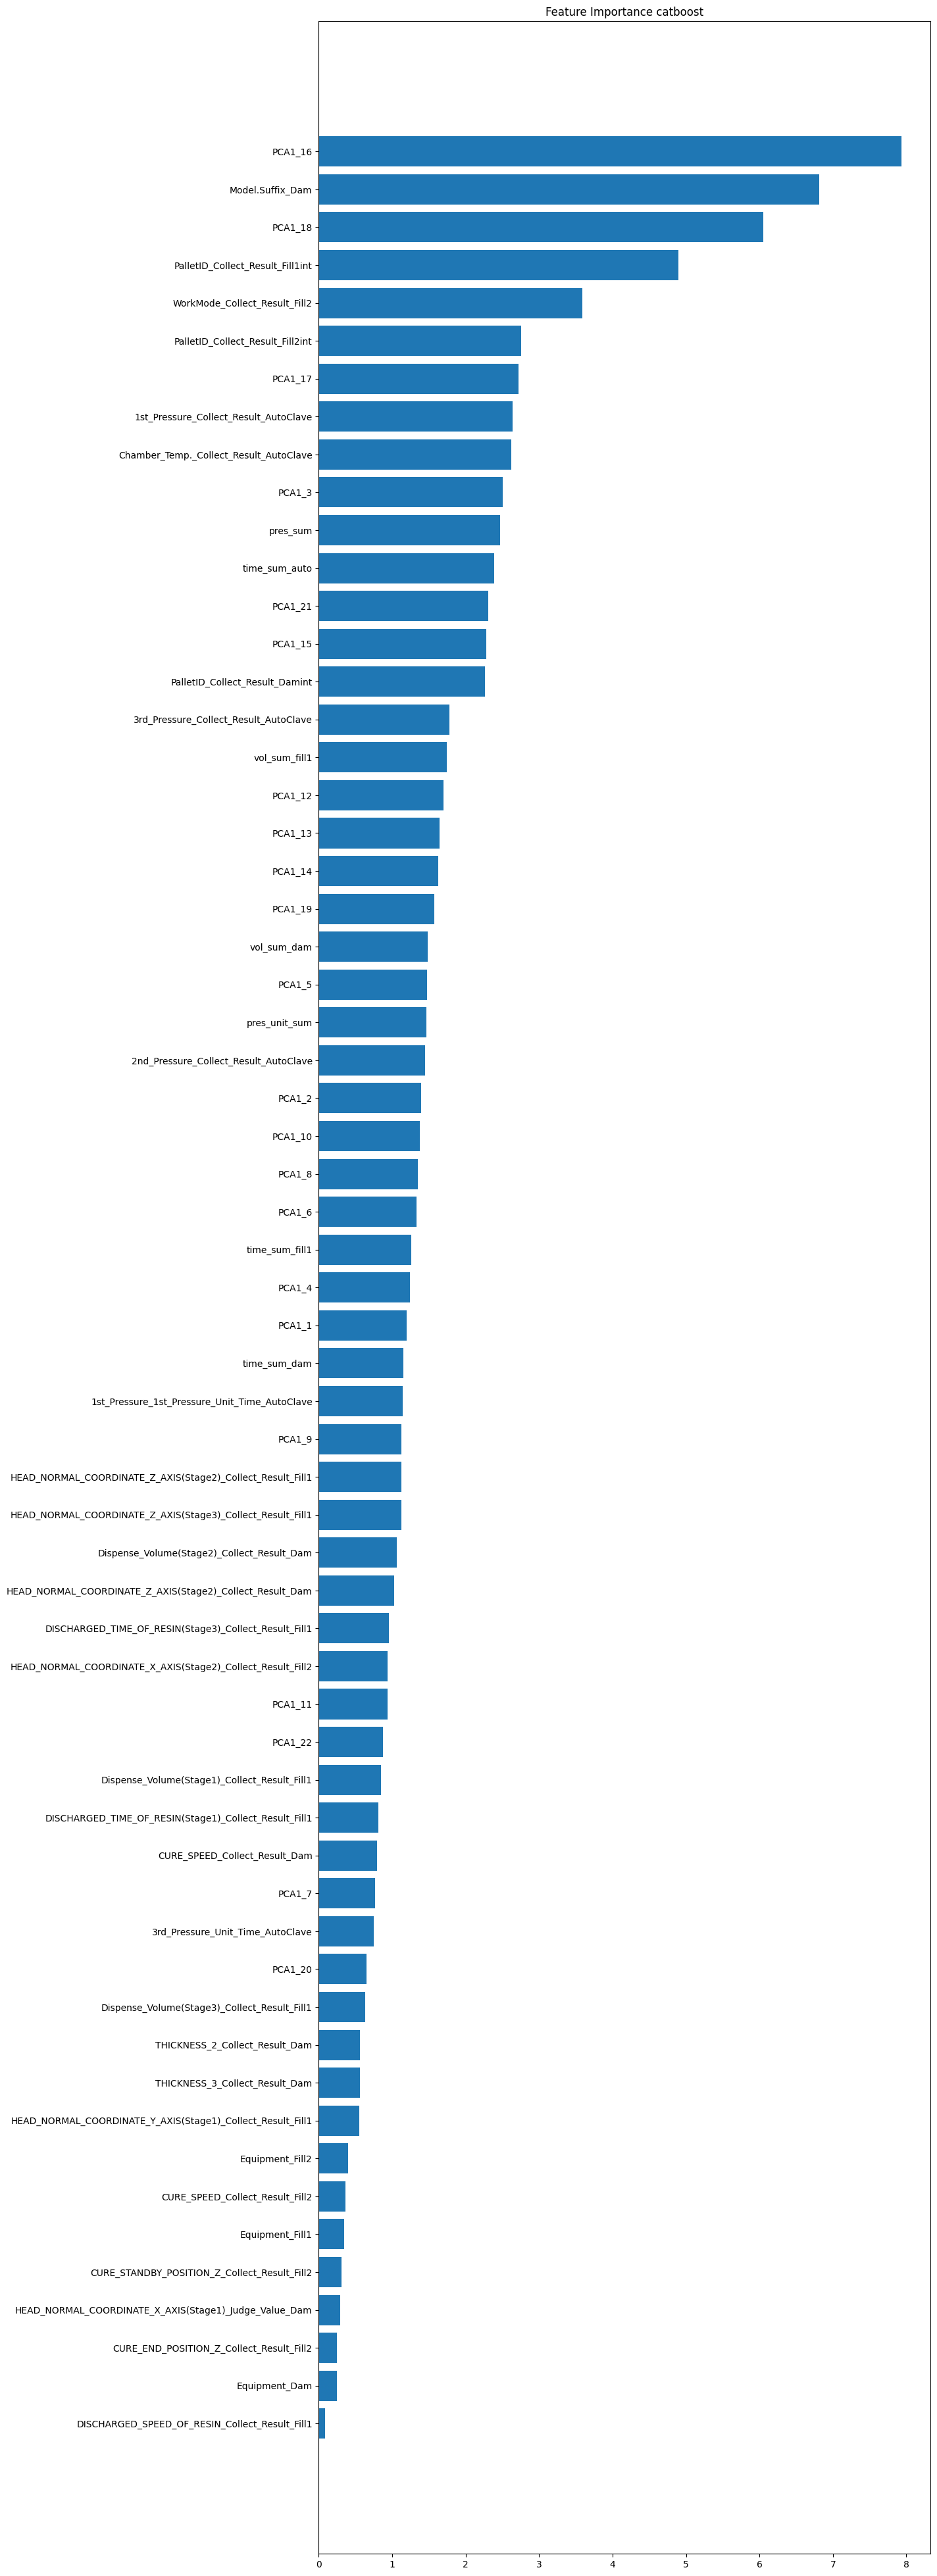

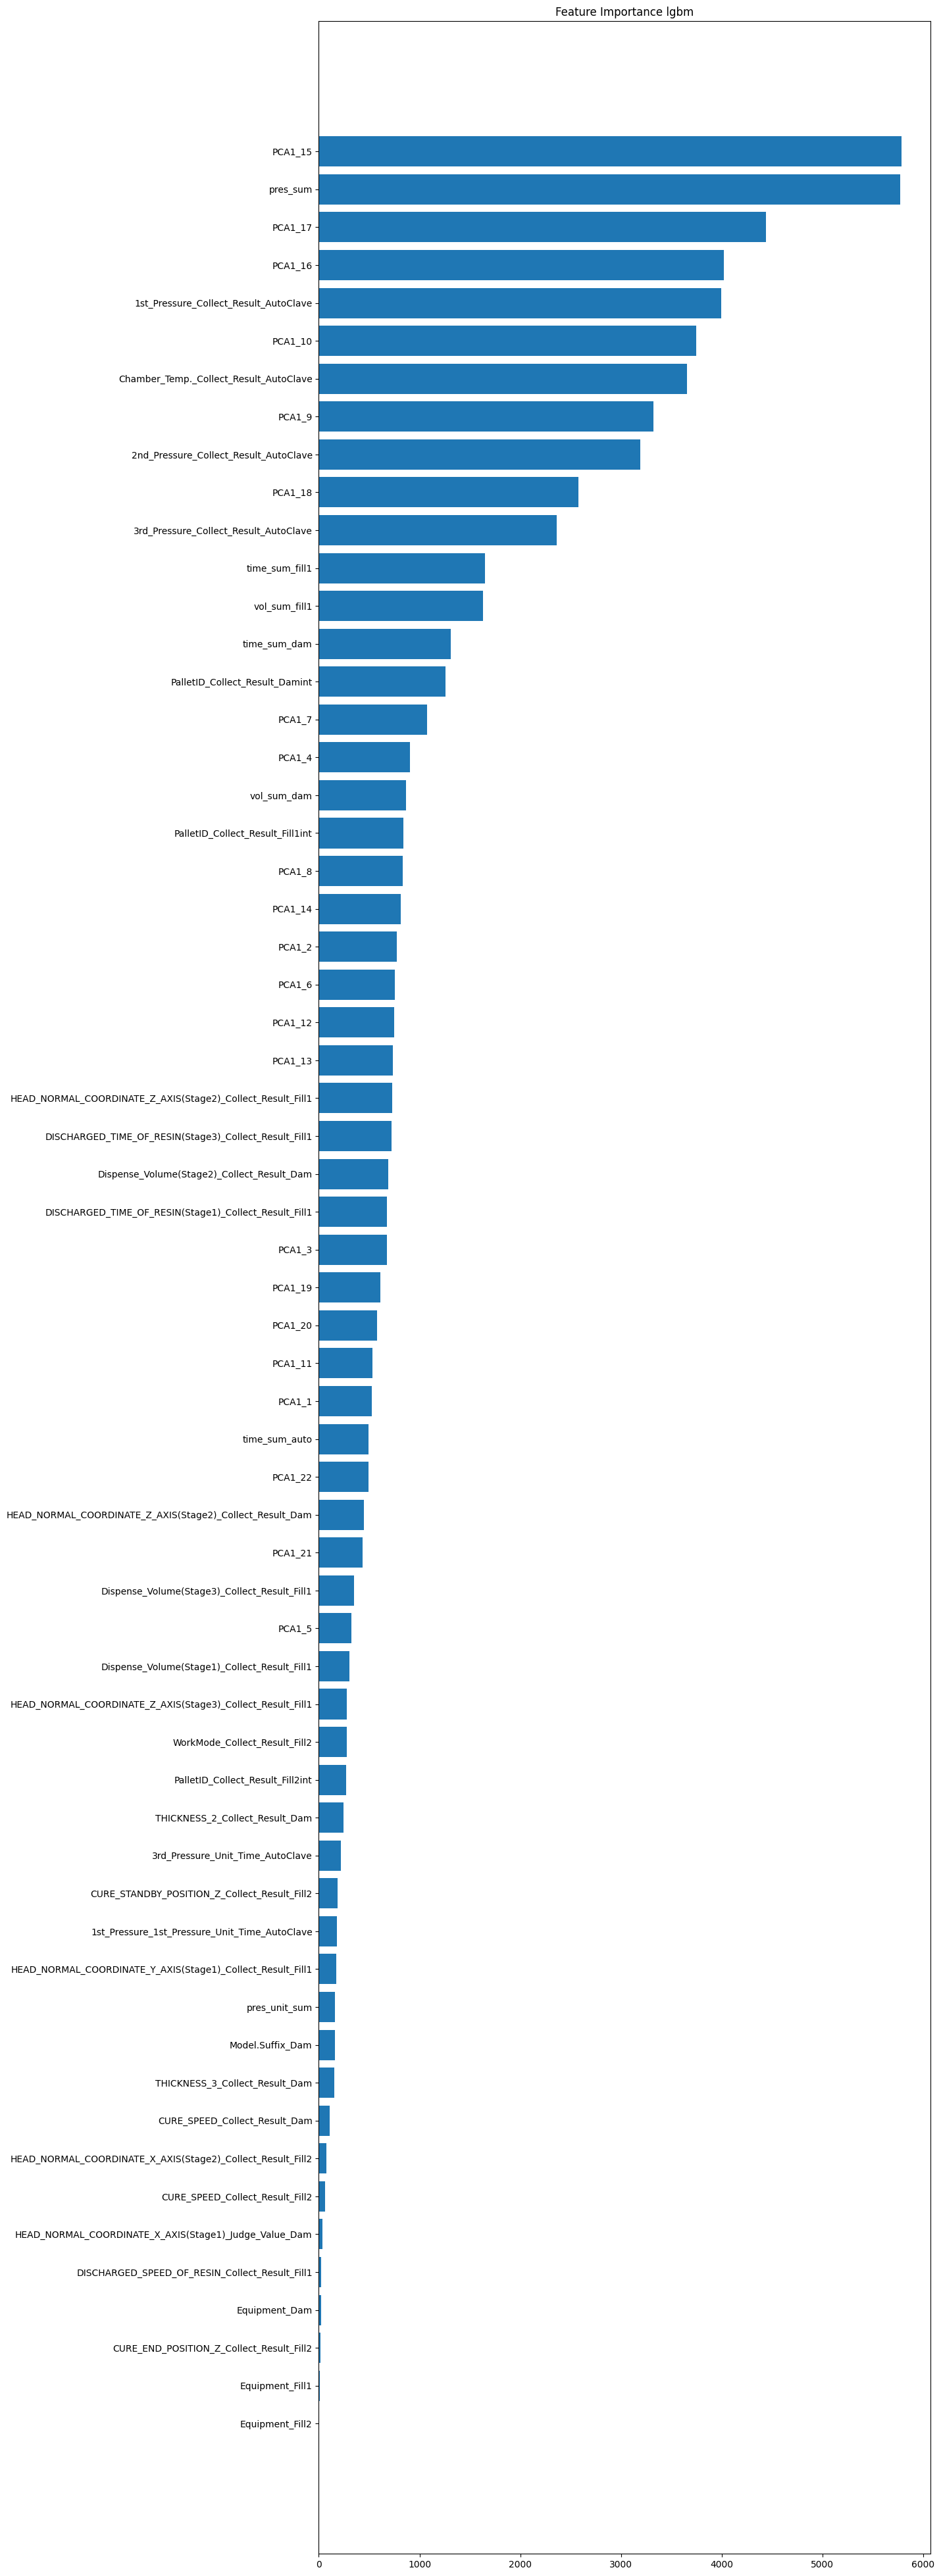

In [ ]:
import matplotlib.pyplot as plt
feature_importance = modelc.feature_importances_
sorted_idx = np.argsort(feature_importance)


# print(np.array(train_x.columns)[sorted_idx])
fig = plt.figure(figsize=(12, 50))


plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(train_x.columns)[sorted_idx])
plt.title('Feature Importance catboost')

feature_importance = modell.feature_importances_
sorted_idx = np.argsort(feature_importance)


# print(np.array(train_x.columns)[sorted_idx])
fig = plt.figure(figsize=(12, 50))


plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(train_x.columns)[sorted_idx])
plt.title('Feature Importance lgbm')

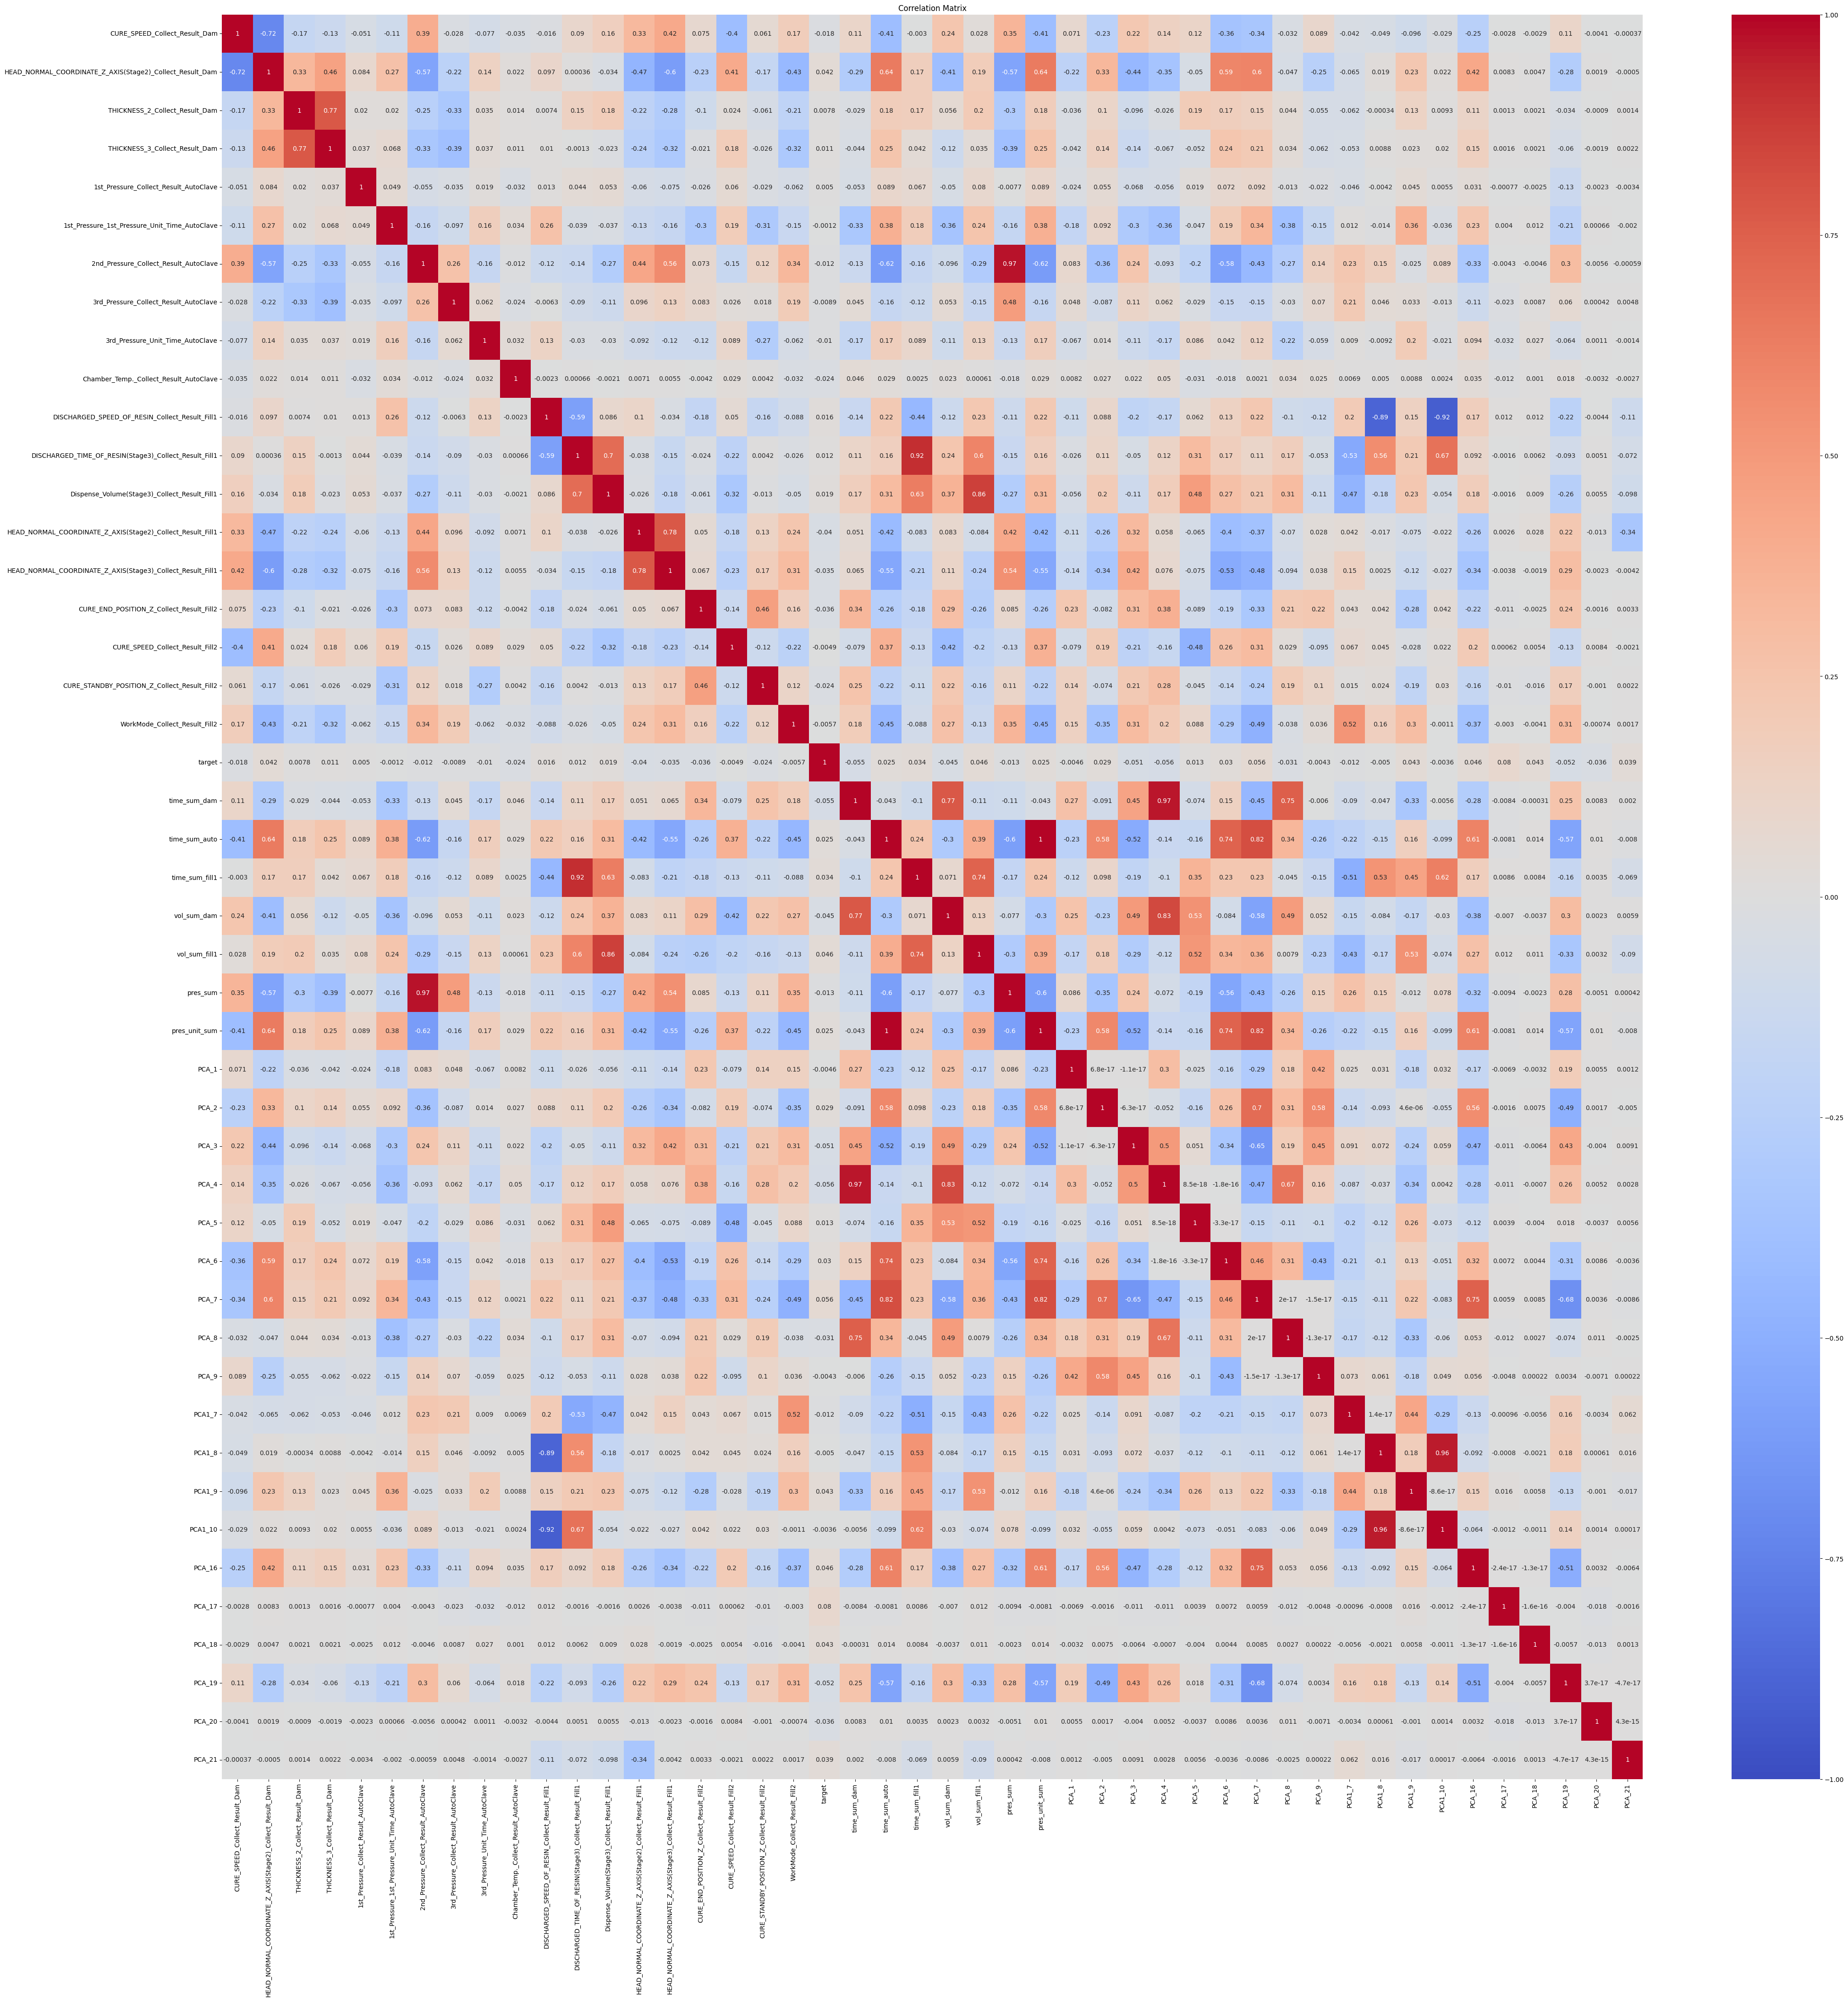

In [ ]:
import seaborn as sns
train_corr = train.drop(obj_col,axis=1)
train_corr["target"] = [0 if el == 'Normal' else 1 for el in train_corr["target"]]
corr = train_corr.corr()

# 상관 행렬을 히트맵으로 시각화
plt.figure(figsize=(50, 50))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df_concat.head(50)


Equipment_Dam Model.Suffix_Dam  Workorder_Dam  \
0   Dam dispenser #2      AJX75334501     3M1XH430-1   
1   Dam dispenser #2      AJX75334501     4E1X0057-1   
2   Dam dispenser #1      AJX75334501     3H1X7976-1   
3   Dam dispenser #1      AJX75334501     3G1XB278-1   
4   Dam dispenser #2      AJX75334501  3HPXX057-0001   
5   Dam dispenser #2      AJX75334501     3K1XB598-2   
6   Dam dispenser #1      AJX75334501     4E1XA027-1   
7   Dam dispenser #1      AJX75334501     3I1XB425-1   
8                NaN              NaN            NaN   
9   Dam dispenser #1      AJX75334501     3G1XC499-1   
10               NaN              NaN            NaN   
11  Dam dispenser #1      AJX75334501     4A1XC341-1   
12  Dam dispenser #1      AJX75334501     3G1XB462-2   
13  Dam dispenser #2      AJX75334501     3M1XH422-1   
14  Dam dispenser #1      AJX75334501     4A1XB975-2   
15  Dam dispenser #2      AJX75334505     4C1XF009-1   
16  Dam dispenser #2      AJX75334502     3I1XA992-1   
17  Dam dispenser #2      AJX75334501     4E1X9170-1   
18  Dam dispenser #2      AJX75334501     3M1XB525-1   
19  Dam dispenser #2      AJX75334501     3K1XA736-1   
20               NaN              NaN            NaN   
21  Dam dispenser #1      AJX75334501     3H1X9884-2   
22  Dam dispenser #2      AJX75334501     3L1XB245-1   
23               NaN              NaN            NaN   
24  Dam dispenser #2      AJX75334501     3L1X8574-2   
25               NaN              NaN            NaN   
26  Dam dispenser #1      AJX75334501     4A1XB542-4   
27  Dam dispenser #1      AJX75334505     4C1XF009-1   
28  Dam dispenser #2      AJX75334502     4A1XE721-1   
29  Dam dispenser #1      AJX75334501     3L1X8506-1   
30  Dam dispenser #2      AJX75334501     3J1XE079-1   
31  Dam dispenser #1      AJX75334505     4F1XB758-2   
32               NaN              NaN            NaN   
33  Dam dispenser #2      AJX75334501     3M1XG843-1   
34  Dam dispenser #2      AJX75334505     4E1XA847-1   
35  Dam dispenser #2      AJX75334501     3M1XC475-1   
36               NaN              NaN            NaN   
37  Dam dispenser #2      AJX75334501     4B1XD691-1   
38  Dam dispenser #2      AJX75334501     4A1XB876-1   
39               NaN              NaN            NaN   
40               NaN              NaN            NaN   
41  Dam dispenser #1      AJX75334501     3H1XE687-1   
42               NaN              NaN            NaN   
43               NaN              NaN            NaN   
44               NaN              NaN            NaN   
45  Dam dispenser #2      AJX75334502     4E1XA077-1   
46  Dam dispenser #2      AJX75334505     4E1X9996-1   
47  Dam dispenser #1      AJX75334501     3M1XH422-2   
48  Dam dispenser #2      AJX75334501     3J1XD965-2   
49  Dam dispenser #1      AJX75334501     3L1X9204-1   

    CURE END POSITION X Collect Result_Dam  \
0                                      1.0   
1                                      1.0   
2                                      0.0   
3                                      0.0   
4                                      1.0   
5                                      1.0   
6                                      0.0   
7                                      0.0   
8                                      NaN   
9                                      0.0   
10                                     NaN   
11                                     0.0   
12                                     0.0   
13                                     1.0   
14                                     0.0   
15                                     1.0   
16                                     1.0   
17                                     1.0   
18                                     1.0   
19                                     1.0   
20                                     NaN   
21                                     0.0   
22                                     1.0   
23                                     NaN   


In [ ]:
normal_ratio = 2.0  # 1.0 means 1:1 ratio
RANDOM_STATE = 42
df_normal = train_data[train_data["target"] == "Normal"]
df_abnormal = train_data[train_data["target"] == "AbNormal"]

num_normal = len(df_normal)
num_abnormal = len(df_abnormal)
print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}")

df_normal = df_normal.sample(n=int(num_abnormal * normal_ratio), replace=False, random_state=RANDOM_STATE)
df_concat = pd.concat([df_normal, df_abnormal], axis=0).reset_index(drop=True)
df_concat.value_counts("target")

  Total: Normal: 30524, AbNormal: 1880


target
Normal      3760
AbNormal    1880
Name: count, dtype: int64

In [ ]:
!pip install lightgbm

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.8 MB/s eta 0:00:00


In [ ]:
!pip install loguniform

In [ ]:
!pip install pytorch_tabnet

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from catboost import CatBoostClassifier
from scipy.stats import randint
from scipy.stats import loguniform
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

param_grid = {
    'n_estimators': randint(500, 1000),
    'depth': randint(1, 15),
    'learning_rate': loguniform(1e-3, 0.1),
    'min_data_in_leaf': randint(1, 5),
    'grow_policy': ['SymmetricTree', 'Lossguide', 'Depthwise']
}

train_x = df_concat.drop("target",axis=1)
train_y = df_concat["target"]
valid_x = valid_data.drop("target",axis=1)
valid_y = valid_data["target"]
valid_y = [0 if el == 'Normal' else 1 for el in valid_y]
train_y = [0 if el == 'Normal' else 1 for el in train_y]


import lightgbm as lgb

model = lgb.LGBMClassifier(
    num_leaves=16,
    learning_rate=0.01,
    n_estimators=1000
)
categorical = []
for col in train_x.columns:
    if train_x[col].dtype == 'object' or train_x[col].dtype.name == 'category':
        train_x[col] = train_x[col].astype('category')
        valid_x[col] = valid_x[col].astype('category')
        categorical.append(col)

# best_params= model.randomized_search(param_grid, train_x, train_y, cv=3, n_iter=10)

model.fit(train_x, train_y, categorical_feature=categorical)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1880, number of negative: 3760
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5555
[LightGBM] [Info] Number of data points in the train set: 5640, number of used features: 145
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147


LGBMClassifier(learning_rate=0.01, n_estimators=1000, num_leaves=16)

In [ ]:
from sklearn.metrics import classification_report, f1_score

valid_x = valid_data.drop("target",axis=1)
valid_y = valid_data["target"]
# 모델로 예측
valid_y_pred = model.predict(valid_x, categorical_feature=categorical)
lgbm_probs = model.predict_proba(valid_x, categorical_feature=categorical)[:,1]
print(lgbm_probs)
# df_valid에 실제 타겟값이 있다고 가정 (예: valid_y)

valid_y = [0 if el == 'Normal' else 1 for el in valid_y]

print(np.array(valid_y).shape)
print(np.array(valid_y_pred).shape)
# 정확도 및 기타 지표 계산
print("f1_score:", f1_score(valid_y, valid_y_pred,pos_label = 1))
print(classification_report(valid_y, valid_y_pred))

[LightGBM] [Warning] Result_Fill1,Equipment_Fill2,Model.Suffix_Fill2,Workorder_Fill2,HEAD is set=, Result_Fill1,Equipment_Fill2,Model.Suffix_Fill2,Workorder_Fill2,HEAD= will be ignored. Current value: Result_Fill1,Equipment_Fill2,Model.Suffix_Fill2,Workorder_Fill2,HEAD=
[LightGBM] [Warning] Judge is set=, Judge= will be ignored. Current value: Judge=
[LightGBM] [Warning] Temp. is set=, Temp.= will be ignored. Current value: Temp.=
[LightGBM] [Warning] Result_Dam,Model.Suffix_AutoClave,Workorder_AutoClave,Chamber is set=, Result_Dam,Model.Suffix_AutoClave,Workorder_AutoClave,Chamber= will be ignored. Current value: Result_Dam,Model.Suffix_AutoClave,Workorder_AutoClave,Chamber=
[LightGBM] [Warning] AXIS(Stage1) is set=, AXIS(Stage1)= will be ignored. Current value: AXIS(Stage1)=
[LightGBM] [Warning] AXIS(Stage1) is set=, AXIS(Stage1)= will be ignored. Current value: AXIS(Stage1)=
[LightGBM] [Warning] AXIS(Stage1) is set=, AXIS(Stage1)= will be ignored. Current value: AXIS(Stage1)=
[Light

In [ ]:
from catboost import CatBoostClassifier
# df_concat.fillna("NOK", inplace=True)
# valid_data.fillna("NOK", inplace=True)
# test.fillna("NOK", inplace=True)

modelc = CatBoostClassifier(iterations = 2000, random_state = 42,eval_metric="F1")
train_x = df_concat.drop("target",axis=1)
train_y = df_concat["target"]
valid_x = valid_data.drop("target",axis=1)
valid_y = valid_data["target"]
valid_y = [0 if el == 'Normal' else 1 for el in valid_y]
train_y = [0 if el == 'Normal' else 1 for el in train_y]

modelc.fit(train_x, train_y, cat_features = obj_col, verbose=100)

In [ ]:
from sklearn.metrics import classification_report, f1_score

valid_x = valid_data.drop("target",axis=1)
valid_y = valid_data["target"]
# 모델로 예측




valid_y_pred = modelc.predict(valid_x)
catboost_probs = modelc.predict_proba(valid_x)[:,1]
# df_valid에 실제 타겟값이 있다고 가정 (예: valid_y)

valid_y = [0 if el == 'Normal' else 1 for el in valid_y]



print(np.array(valid_y).shape)
print(np.array(valid_y_pred).shape)
# 정확도 및 기타 지표 계산
print("f1_score:", f1_score(valid_y, valid_y_pred,pos_label = 1))
print(classification_report(valid_y, valid_y_pred))

(8102,)
(8102,)
f1_score: 0.20292504570383915
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7632
           1       0.18      0.24      0.20       470

    accuracy                           0.89      8102
   macro avg       0.56      0.58      0.57      8102
weighted avg       0.91      0.89      0.90      8102



In [ ]:
valid_data.head(
)

Equipment_Dam Model.Suffix_Dam Workorder_Dam  \
12422  Dam dispenser #1      AJX75334501    3M1XH389-1   
32393  Dam dispenser #1      AJX75334501    3H1XC875-1   
28332  Dam dispenser #1      AJX75334501    3G1XB176-1   
3904   Dam dispenser #1      AJX75334501    4C1XD439-2   
23781  Dam dispenser #2      AJX75334501    3J1XC663-1   

       CURE END POSITION X Collect Result_Dam  \
12422                                     0.0   
32393                                     0.0   
28332                                     0.0   
3904                                      0.0   
23781                                     1.0   

       CURE END POSITION Z Collect Result_Dam  \
12422                                     0.0   
32393                                     0.0   
28332                                     0.0   
3904                                      0.0   
23781                                     1.0   

       CURE END POSITION Θ Collect Result_Dam  CURE SPEED Collect Result_Dam  \
12422                                     0.0                       0.000000   
32393                                     0.0                       0.000000   
28332                                     0.0                       0.000000   
3904                                      0.0                       0.857143   
23781                                     1.0                       0.000000   

       CURE START POSITION X Collect Result_Dam  \
12422                                       1.0   
32393                                       1.0   
28332                                       1.0   
3904                                        1.0   
23781                                       0.0   

       CURE START POSITION Θ Collect Result_Dam  \
12422                                       0.0   
32393                                       0.0   
28332                                       0.0   
3904                                        0.0   
23781                                       1.0   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  ...  \
12422                                           1.0  ...   
32393                                           0.0  ...   
28332                                           0.0  ...   
3904                                            1.0  ...   
23781                                           0.0  ...   

       Head Clean Position Z Collect Result_Fill2  \
12422                                         0.0   
32393                                         1.0   
28332                                         1.0   
3904                                          0.0   
23781                                         1.0   

       Head Purge Position X Collect Result_Fill2  \
12422                                         0.0   
32393                                         1.0   
28332                                         1.0   
3904                                          0.0   
23781                                         1.0   

       Head Purge Position Y Collect Result_Fill2  \
12422                                         1.0   
32393                                         0.0   
28332                                         0.0   
3904                                          1.0   
23781                                         0.0   

       Head Purge Position Z Collect Result_Fill2  \
12422                                         0.0   
32393                                         1.0   
28332                                         1.0   
3904                                          0.0   
23781                                         1.0   

       Machine Tact time Collect Result_Fill2  PalletID Collect Result_Fill2  \
12422                                0.252908                       0.356455   
32393                                0.007880                       0.000000   
28332                                0.003752                       0.115607   
3904               

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
modelx = xgb.XGBClassifier(random_state = 42)
train_x = df_concat.drop("target",axis=1)
train_y = df_concat["target"]
valid_x = valid_data.drop("target",axis=1)
valid_y = valid_data["target"]
valid_y = [0 if el == 'Normal' else 1 for el in valid_y]
train_y = [0 if el == 'Normal' else 1 for el in train_y]
categorical_features = []
for col in train_x.columns:
    if train_x[col].dtype == 'object' or train_x[col].dtype.name == 'category':
        train_x[col] = train_x[col].astype('category')
        valid_x[col] = valid_x[col].astype('category')
        categorical_features.append(col)

encoder = OneHotEncoder(drop = "first", sparse = False, handle_unknown = "ignore")
train_x_encoded = encoder.fit_transform(train_x[categorical_features])
valid_x_encoded = encoder.transform(valid_x[categorical_features])
train_x_reamining = train_x.drop(categorical_features, axis = 1)
valid_x_remaining = valid_x.drop(categorical_features, axis = 1)
train_x_comb = np.concatenate([train_x_encoded, train_x_reamining], axis = 1)
valid_x_comb = np.concatenate([valid_x_encoded, valid_x_remaining], axis = 1)
modelx.fit(train_x_comb, train_y,  verbose=100)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [2, 5, 9, 13] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import classification_report, f1_score

valid_y_pred = modelx.predict(valid_x_comb)
xgboost_probs = modelx.predict_proba(valid_x_comb)[:,1]
# df_valid에 실제 타겟값이 있다고 가정 (예: valid_y)


print(valid_y)
print(valid_y_pred)

print(np.array(valid_y).shape)
print(np.array(valid_y_pred).shape)
# 정확도 및 기타 지표 계산
print("f1_score:", f1_score(valid_y, valid_y_pred,pos_label = 1))
print(classification_report(valid_y, valid_y_pred))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
ensemble_probs = (lgbm_probs + catboost_probs+0.5*xgboost_probs) / 2.5
ensemble_predictions = (ensemble_probs > 0.51).astype(int)
print("f1_score:", f1_score(valid_y, ensemble_predictions,pos_label = 1))
print(classification_report(valid_y, ensemble_predictions))
print(sum(valid_y))
print(sum(ensemble_predictions))

f1_score: 0.21762589928057555
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7632
           1       0.19      0.26      0.22       470

    accuracy                           0.89      8102
   macro avg       0.57      0.59      0.58      8102
weighted avg       0.91      0.89      0.90      8102

470
642


In [ ]:
print(model.predict_proba(valid_x, categorical_feature=categorical))

[LightGBM] [Warning] AXIS(Stage1) is set=, AXIS(Stage1)= will be ignored. Current value: AXIS(Stage1)=
[LightGBM] [Warning] AXIS(Stage1) is set=, AXIS(Stage1)= will be ignored. Current value: AXIS(Stage1)=
[LightGBM] [Warning] X is set=, X= will be ignored. Current value: X=
[LightGBM] [Warning] X is set=, X= will be ignored. Current value: X=
[LightGBM] [Warning] Collect is set=, Collect= will be ignored. Current value: Collect=
[LightGBM] [Warning] Collect is set=, Collect= will be ignored. Current value: Collect=
[LightGBM] [Warning] NORMAL is set=, NORMAL= will be ignored. Current value: NORMAL=
[LightGBM] [Warning] NORMAL is set=, NORMAL= will be ignored. Current value: NORMAL=
[LightGBM] [Warning] COORDINATE is set=, COORDINATE= will be ignored. Current value: COORDINATE=
[LightGBM] [Warning] COORDINATE is set=, COORDINATE= will be ignored. Current value: COORDINATE=
[LightGBM] [Warning] Unknown parameter: COORDINATE
[LightGBM] [Warning] Unknown parameter: NORMAL
[LightGBM] [Warn

In [ ]:
test_drop = test.drop(["target", "Set ID"], axis=1)
test_encoded = encoder.transform(test_drop[categorical_features])
test_remaining = test_drop.drop(categorical_features, axis = 1)
test_comb = np.concatenate([test_encoded, test_remaining], axis = 1)
xgboost_test_pred = modelx.predict_proba(test_comb)[:,1]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [2, 5, 9, 10, 13] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
lgbm_test_pred = model.predict_proba(test.drop(["target", "Set ID"], axis=1))[:,1]
catboost_test_pred = modelc.predict_proba(test.drop(["target", "Set ID"], axis=1))[:,1]
ensemble_test_pred = (lgbm_test_pred + catboost_test_pred + xgboost_test_pred) / 3
ensemble_test_pred = (ensemble_test_pred > 0.5).astype(int)
print(len(ensemble_test_pred))
print(sum(ensemble_test_pred))

17361
1703


In [ ]:
test_pred = ['Normal' if el == 0 else "AbNormal" for el in ensemble_test_pred]
df_sub = pd.read_csv("/content/drive/MyDrive/submission.csv")

df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("/content/drive/MyDrive/submissionen2.csv", index=False)

여기 위까지가 결과

'Workorder_Dam',
'Production Qty Collect Result_Dam',
'1st Pressure Collect Result_AutoClave',
'PalletID Collect Result_Dam',
'Receip No Collect Result_Dam',
'2nd Pressure Collect Result_AutoClave',
'Chamber Temp. Collect Result_AutoClave',
'PalletID Collect Result_Fill1',
'PalletID Collect Result_Fill2',
'3rd Pressure Collect Result_AutoClave',
'Machine Tact time Collect Result_Fill1',
'Production Qty Collect Result_Fill1',
'Machine Tact time Collect Result_Dam',
'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
'Machine Tact time Collect Result_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam',
'Dispense Volume(Stage2) Collect Result_Dam',
'Production Qty Collect Result_Fill2',
'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1'

Text(0.5, 1.0, 'Feature Importance')

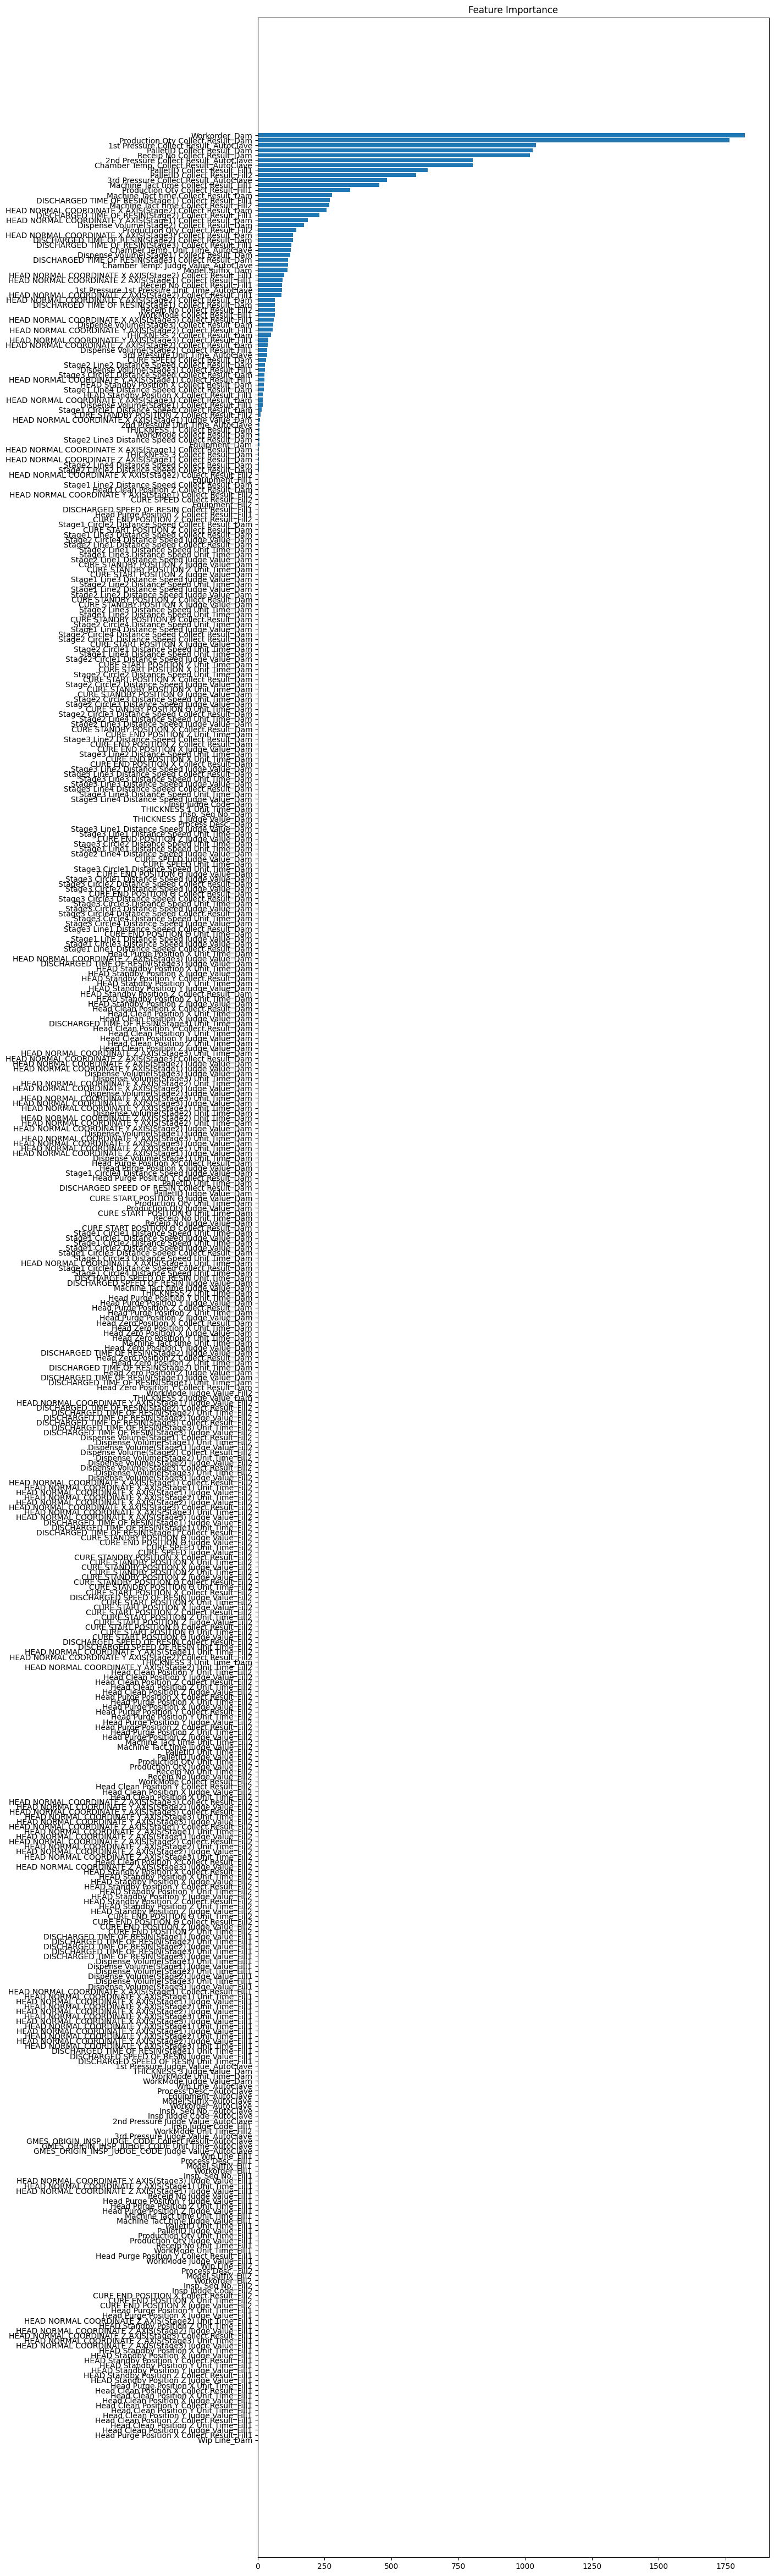

In [ ]:
import matplotlib.pyplot as plt
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
for k in reversed(np.array(train_x.columns)[sorted_idx]):
    print(f"'{k}',")

# print(np.array(train_x.columns)[sorted_idx])
fig = plt.figure(figsize=(12, 60))


plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(train_x.columns)[sorted_idx])
plt.title('Feature Importance')


In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

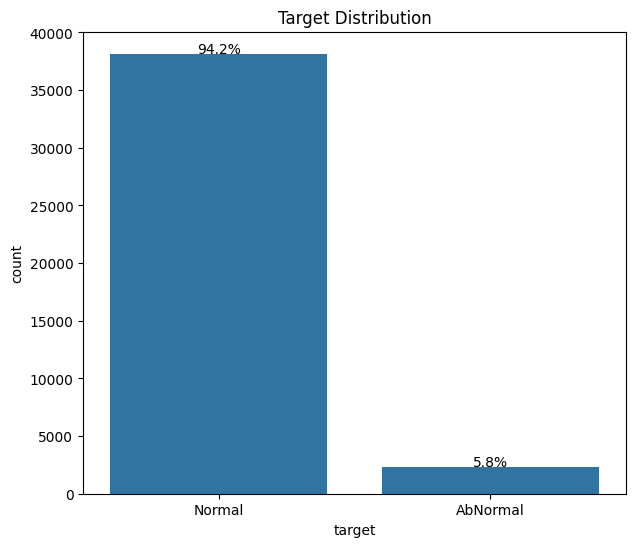

In [ ]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율

        # (x, y) 좌표에 텍스트 입력
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬

plt.figure(figsize=(7, 6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution');


In [ ]:
columns=train.columns.values
bin_features=[]
for column in columns:
  if len(train[column].value_counts().unique())==2:
    bin_features.append(column)
print(bin_features)
print(len(bin_features))
for column in bin_features:
  if len(test[column].value_counts().unique())!=2:
    print(column)

['Equipment_Dam', 'CURE END POSITION X Collect Result_Dam', 'CURE END POSITION Z Collect Result_Dam', 'CURE END POSITION Θ Collect Result_Dam', 'CURE START POSITION X Collect Result_Dam', 'CURE START POSITION Θ Collect Result_Dam', 'HEAD Standby Position Y Collect Result_Dam', 'HEAD Standby Position Z Collect Result_Dam', 'Head Clean Position X Collect Result_Dam', 'Head Clean Position Y Collect Result_Dam', 'Head Purge Position Y Collect Result_Dam', 'Head Zero Position X Collect Result_Dam', 'Chamber Temp. Judge Value_AutoClave', 'Equipment_Fill1', 'HEAD Standby Position Y Collect Result_Fill1', 'HEAD Standby Position Z Collect Result_Fill1', 'Head Clean Position X Collect Result_Fill1', 'Head Clean Position Y Collect Result_Fill1', 'Head Clean Position Z Collect Result_Fill1', 'Head Purge Position X Collect Result_Fill1', 'Head Purge Position Y Collect Result_Fill1', 'Equipment_Fill2', 'CURE END POSITION X Collect Result_Fill2', 'CURE START POSITION X Collect Result_Fill2', 'HEAD NO

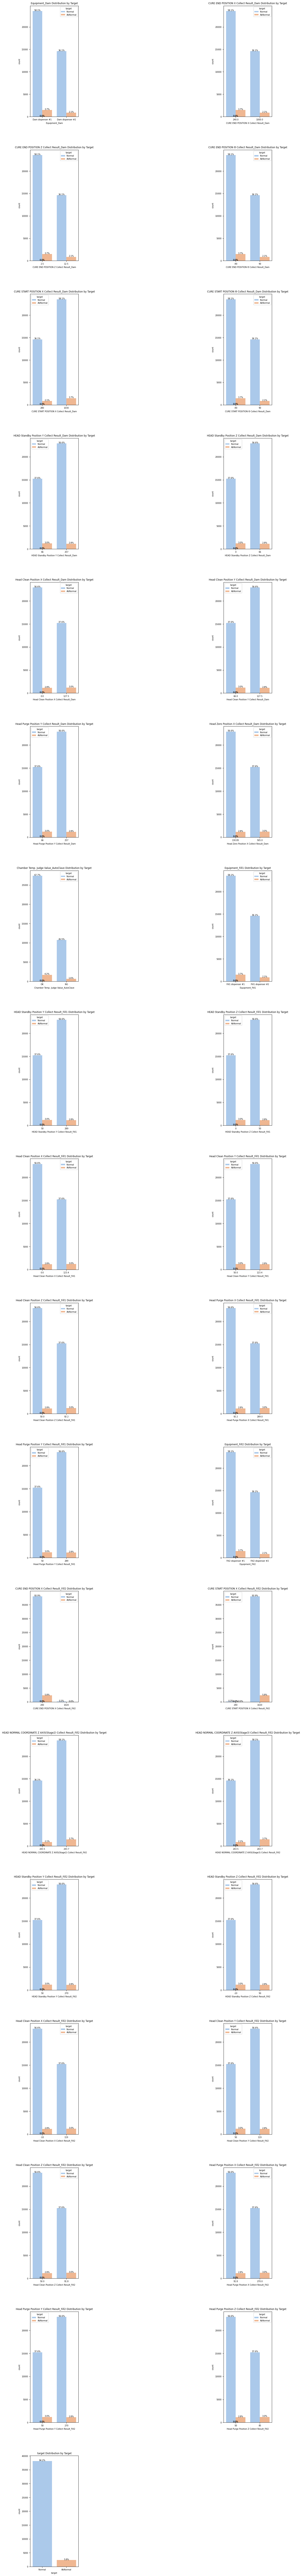

In [ ]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

# 3행 2열 틀(Figure) 준비
mpl.rc('font', size=7)
grid = gridspec.GridSpec(18, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(15, 160))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=3, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기


for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])

    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature,
                  data=train,
                  hue='target',
                  palette='pastel', # 그래프 색상 설정
                  ax=ax)

    ax.set_title(f'{feature} Distribution by Target') # 그래프 제목 설정
    write_percent(ax, len(train))

In [ ]:
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
def plot_abnormal_ratio_by_features(df, features, num_rows, num_cols, size=(15, 70)):
    plt.figure(figsize=size)  # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols)  # 서브플롯 배치
    plt.subplots_adjust(wspace=1, hspace=1)  # 서브플롯 좌우/상하 여백 설정

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])



        # 막대 그래프 그리기
        sns.barplot(x=feature, y='target', data=df, palette='Set2', ax=ax)
        ax.set_title(f'Feature: {feature}')







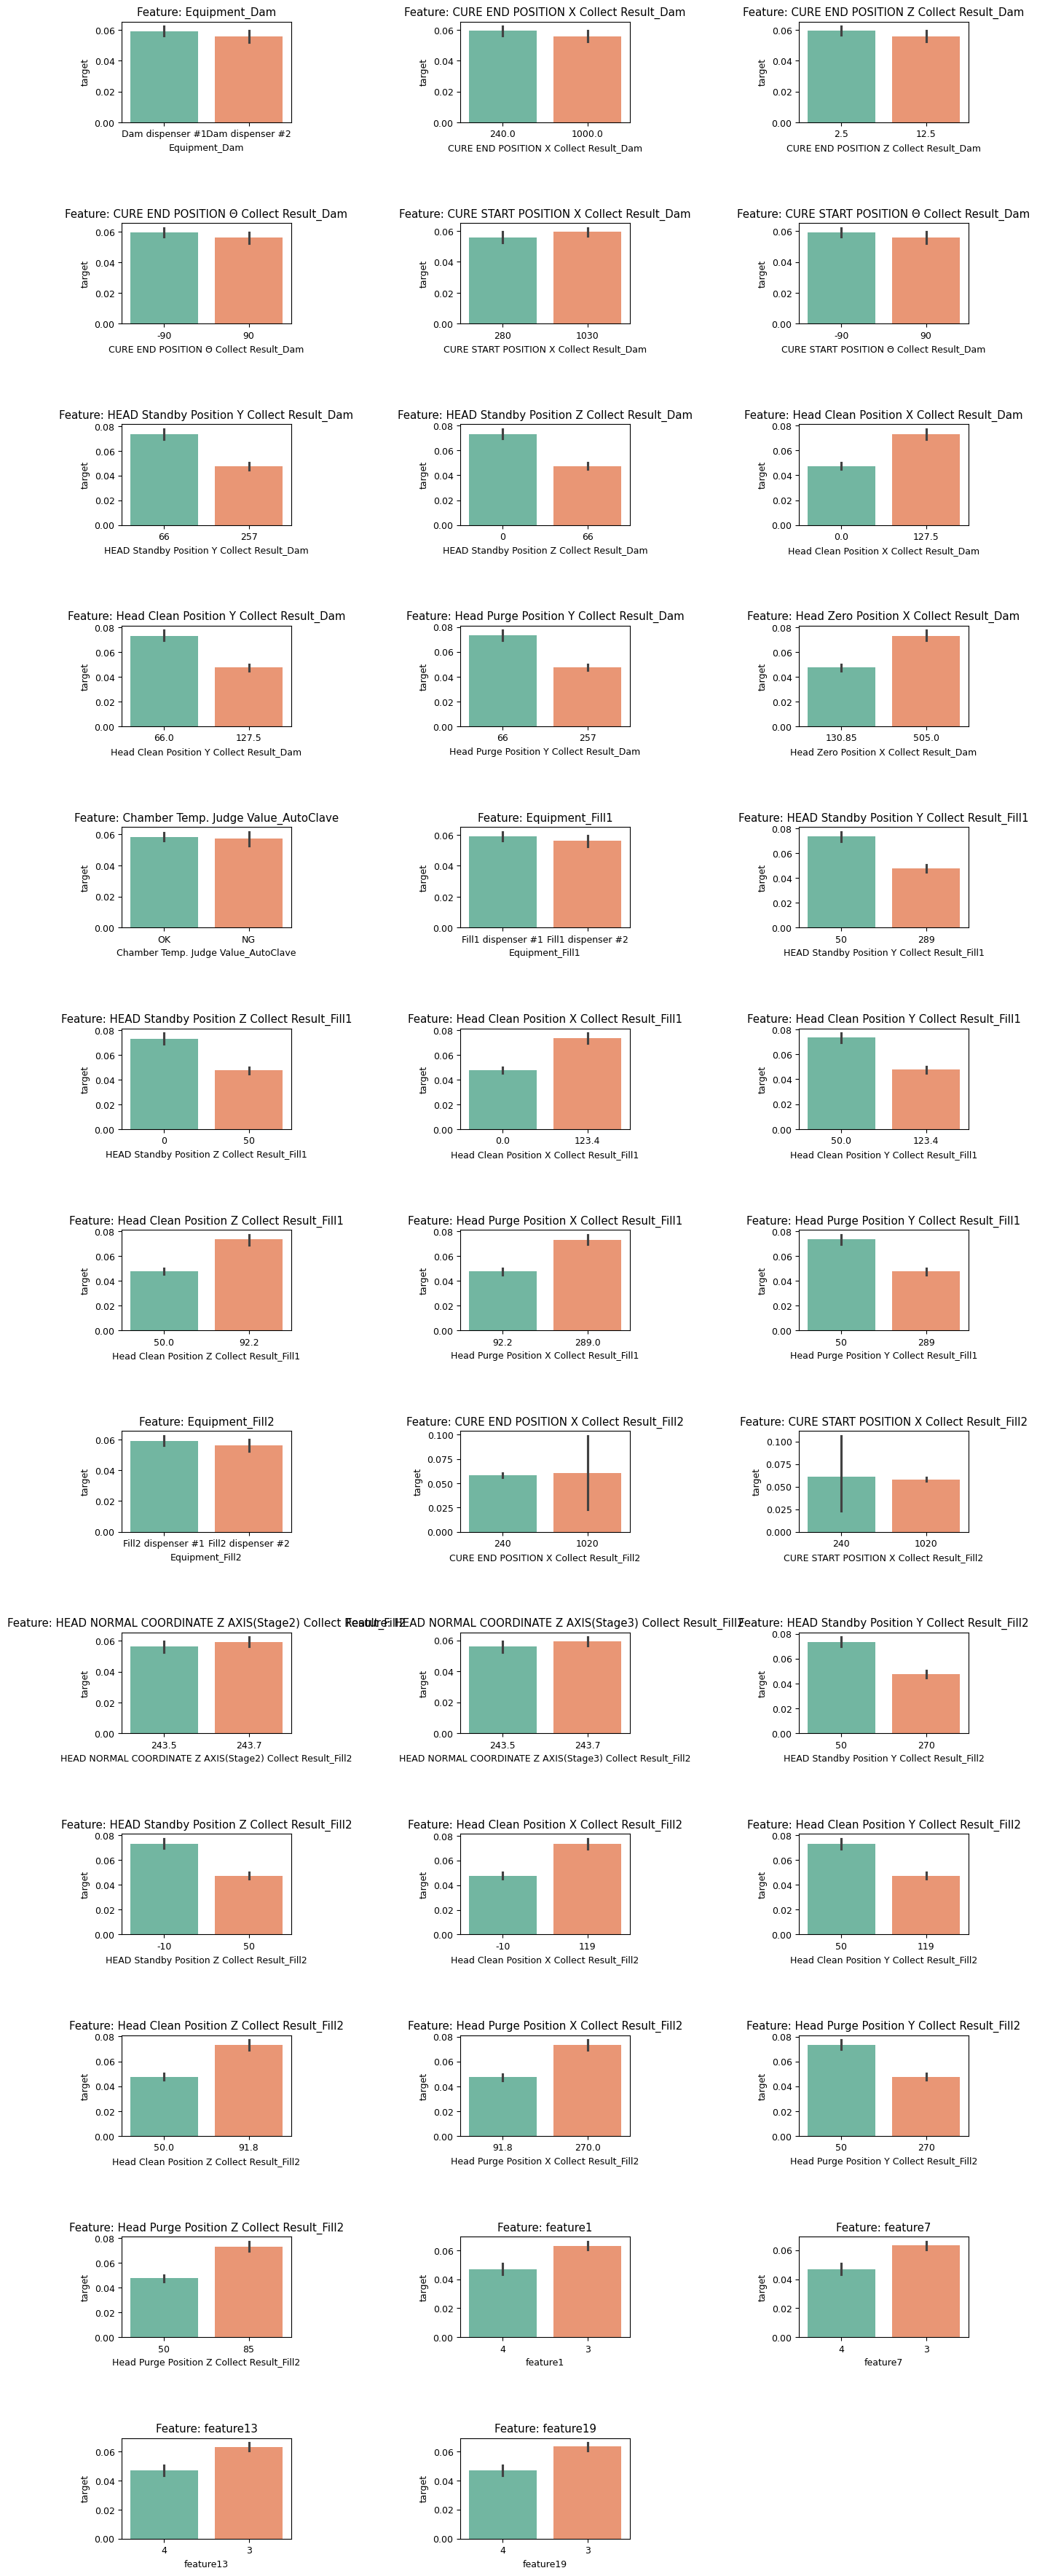

In [ ]:
import warnings

# 모든 FutureWarning 무시
warnings.simplefilter(action='ignore', category=FutureWarning)
bin_features = [col for col in train.columns if train[col].nunique() == 2 and col != 'target']
tr = train.copy()
tr['target'] = tr['target'].apply(lambda x: 1 if x == 'AbNormal' else 0)
# for i in bin_features:
#   train[i] = train[i].astype(object)
# for idx, col in enumerate(train.columns):
#     unique_values = train[col].unique()  # 고윳값 추출
#     if len(unique_values) == 2:  # 고윳값 개수가 2개인지 확인
#         bin_features.append(idx)
# 이진 피처 고윳값별 타깃값 1 비율을 막대 그래프로 그리기
plot_abnormal_ratio_by_features(tr, bin_features, 20, 3) # 6행 3열 배치

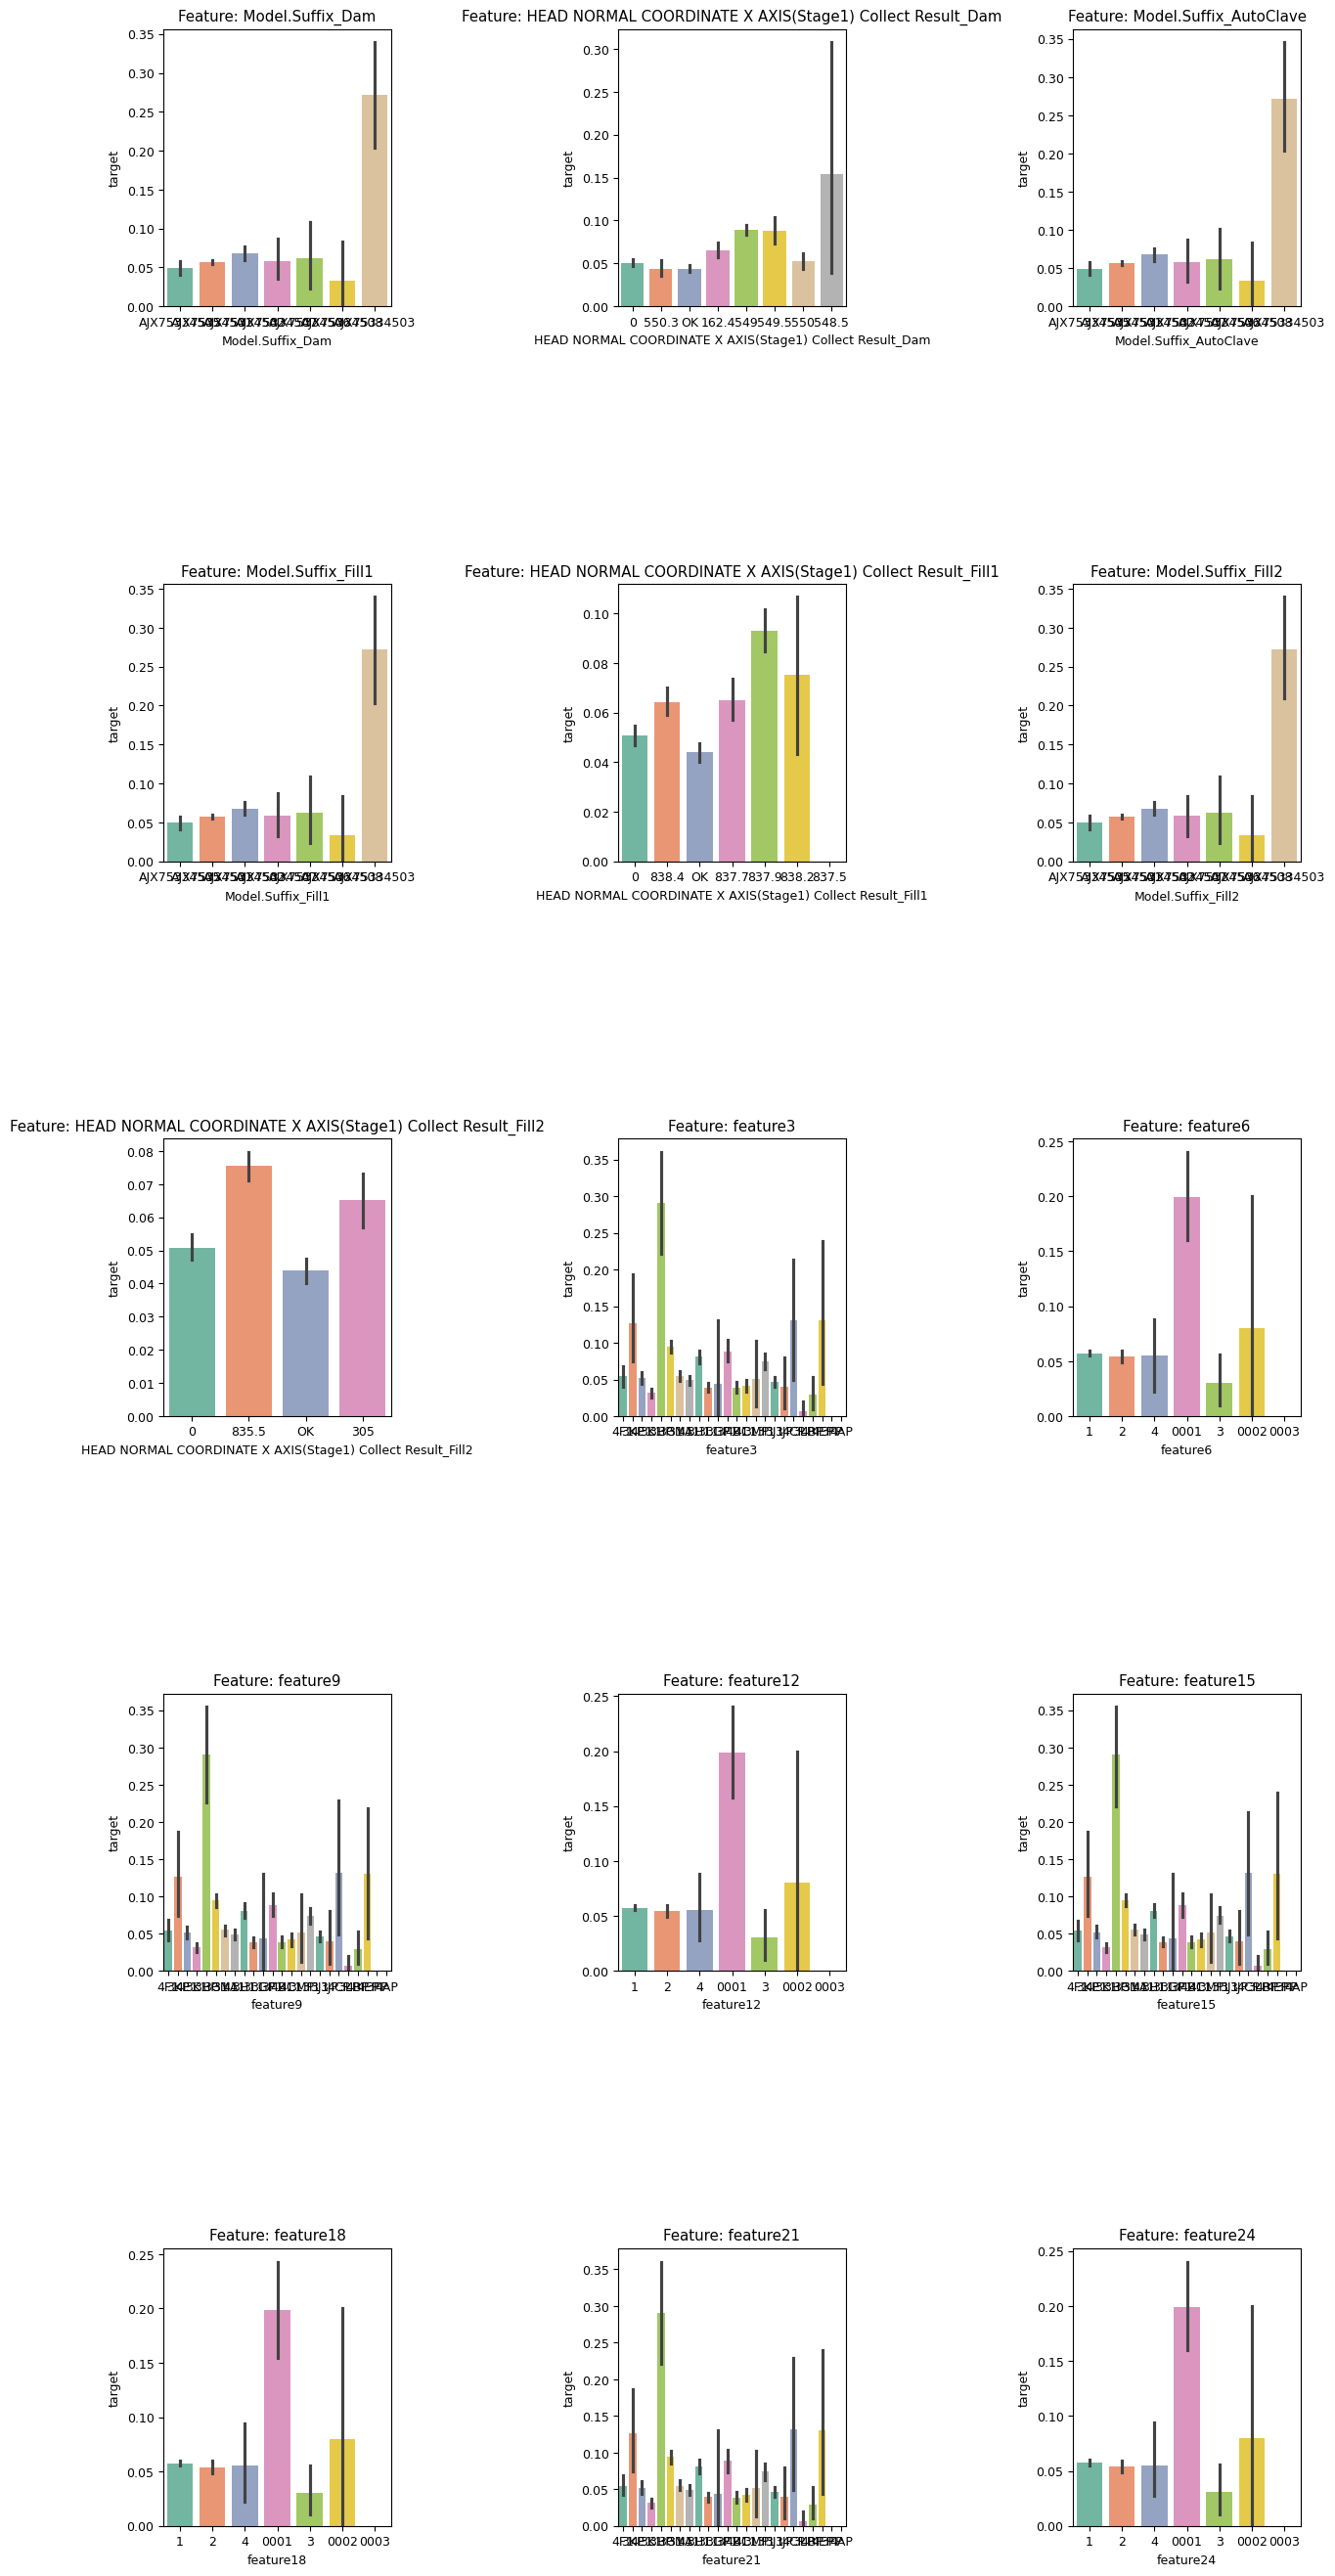

In [ ]:
nom_features = [col for col in train.columns if train[col].dtype =="object" and 2<train[col].nunique()<30 and col!="target"]

plot_abnormal_ratio_by_features(tr, nom_features, 10, 3) # 6행 3열 배치

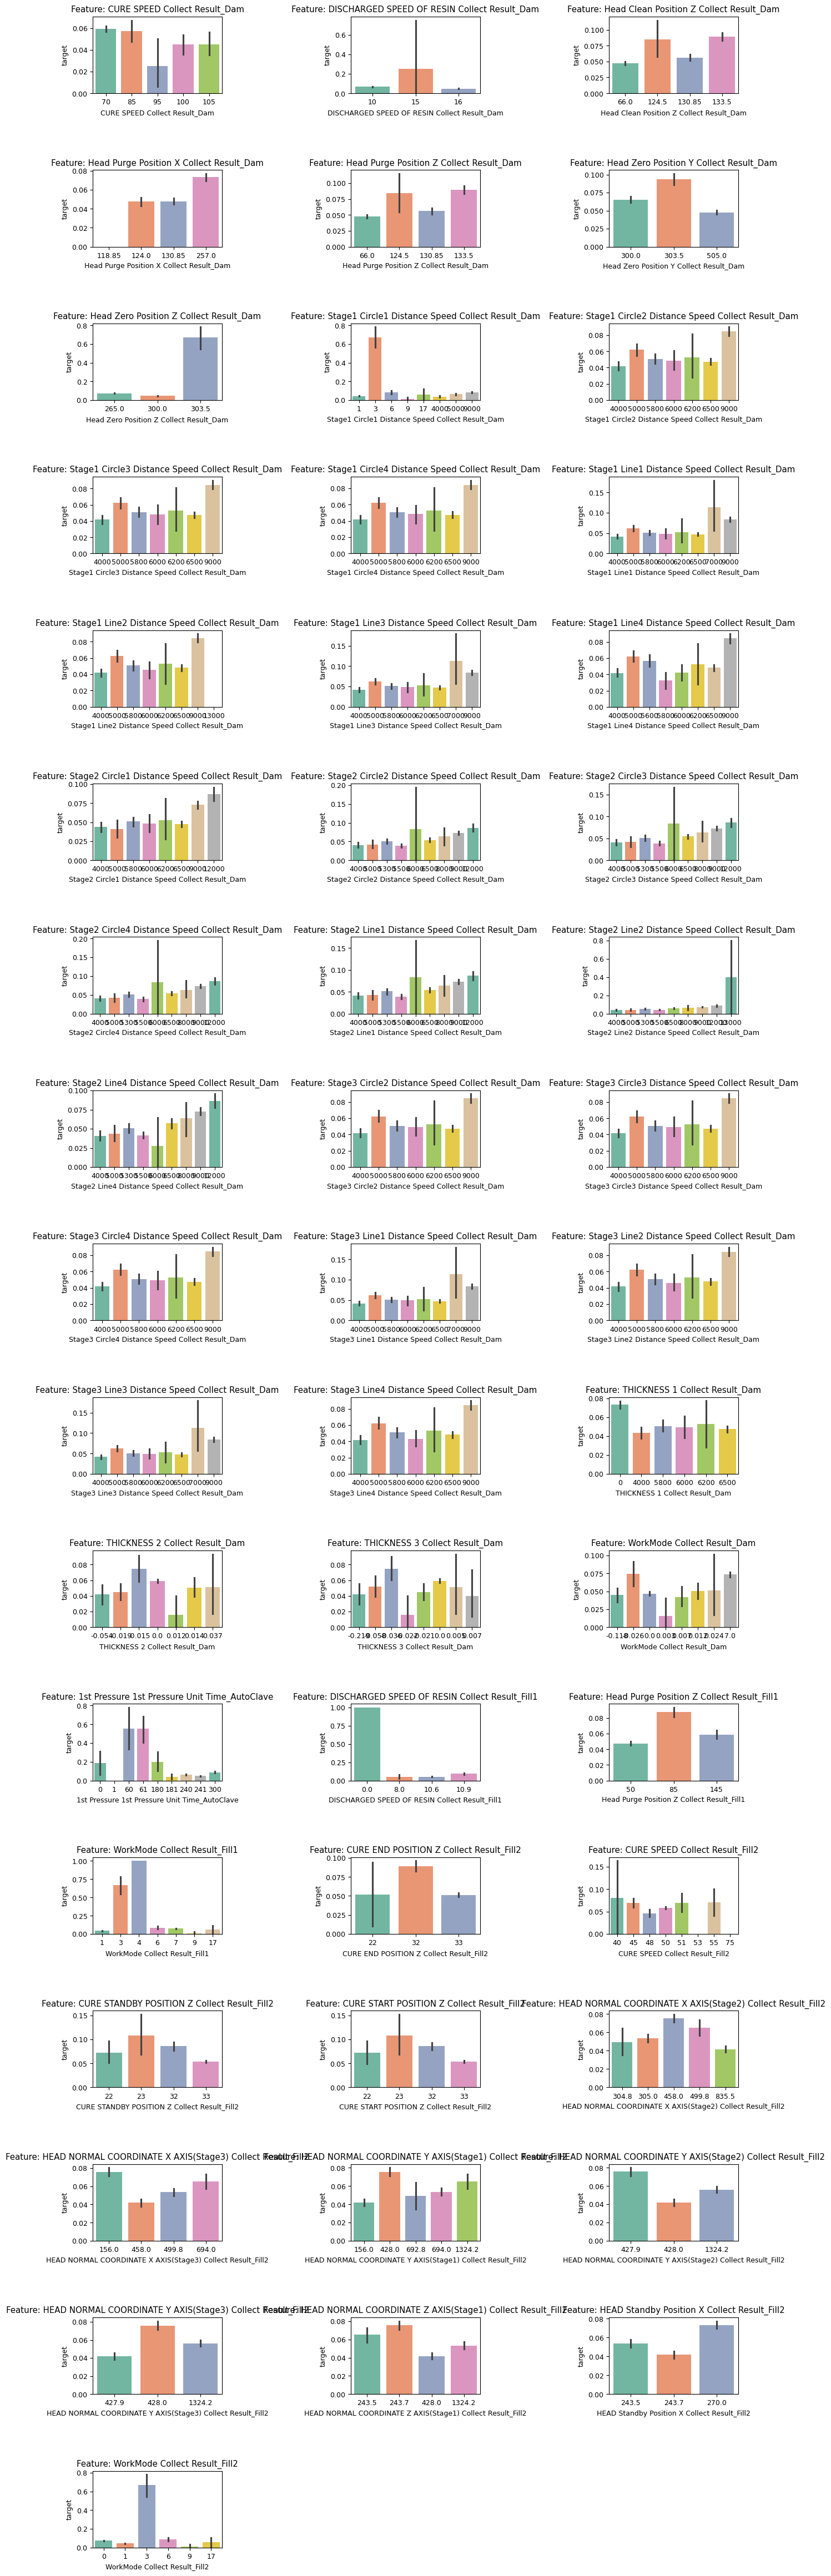

In [ ]:
ord_features = [col for col in train.columns if 2<train[col].nunique() <10 and train[col].dtype !="object"]
plot_abnormal_ratio_by_features(tr, ord_features, 20, 3) # 6행 3열 배치

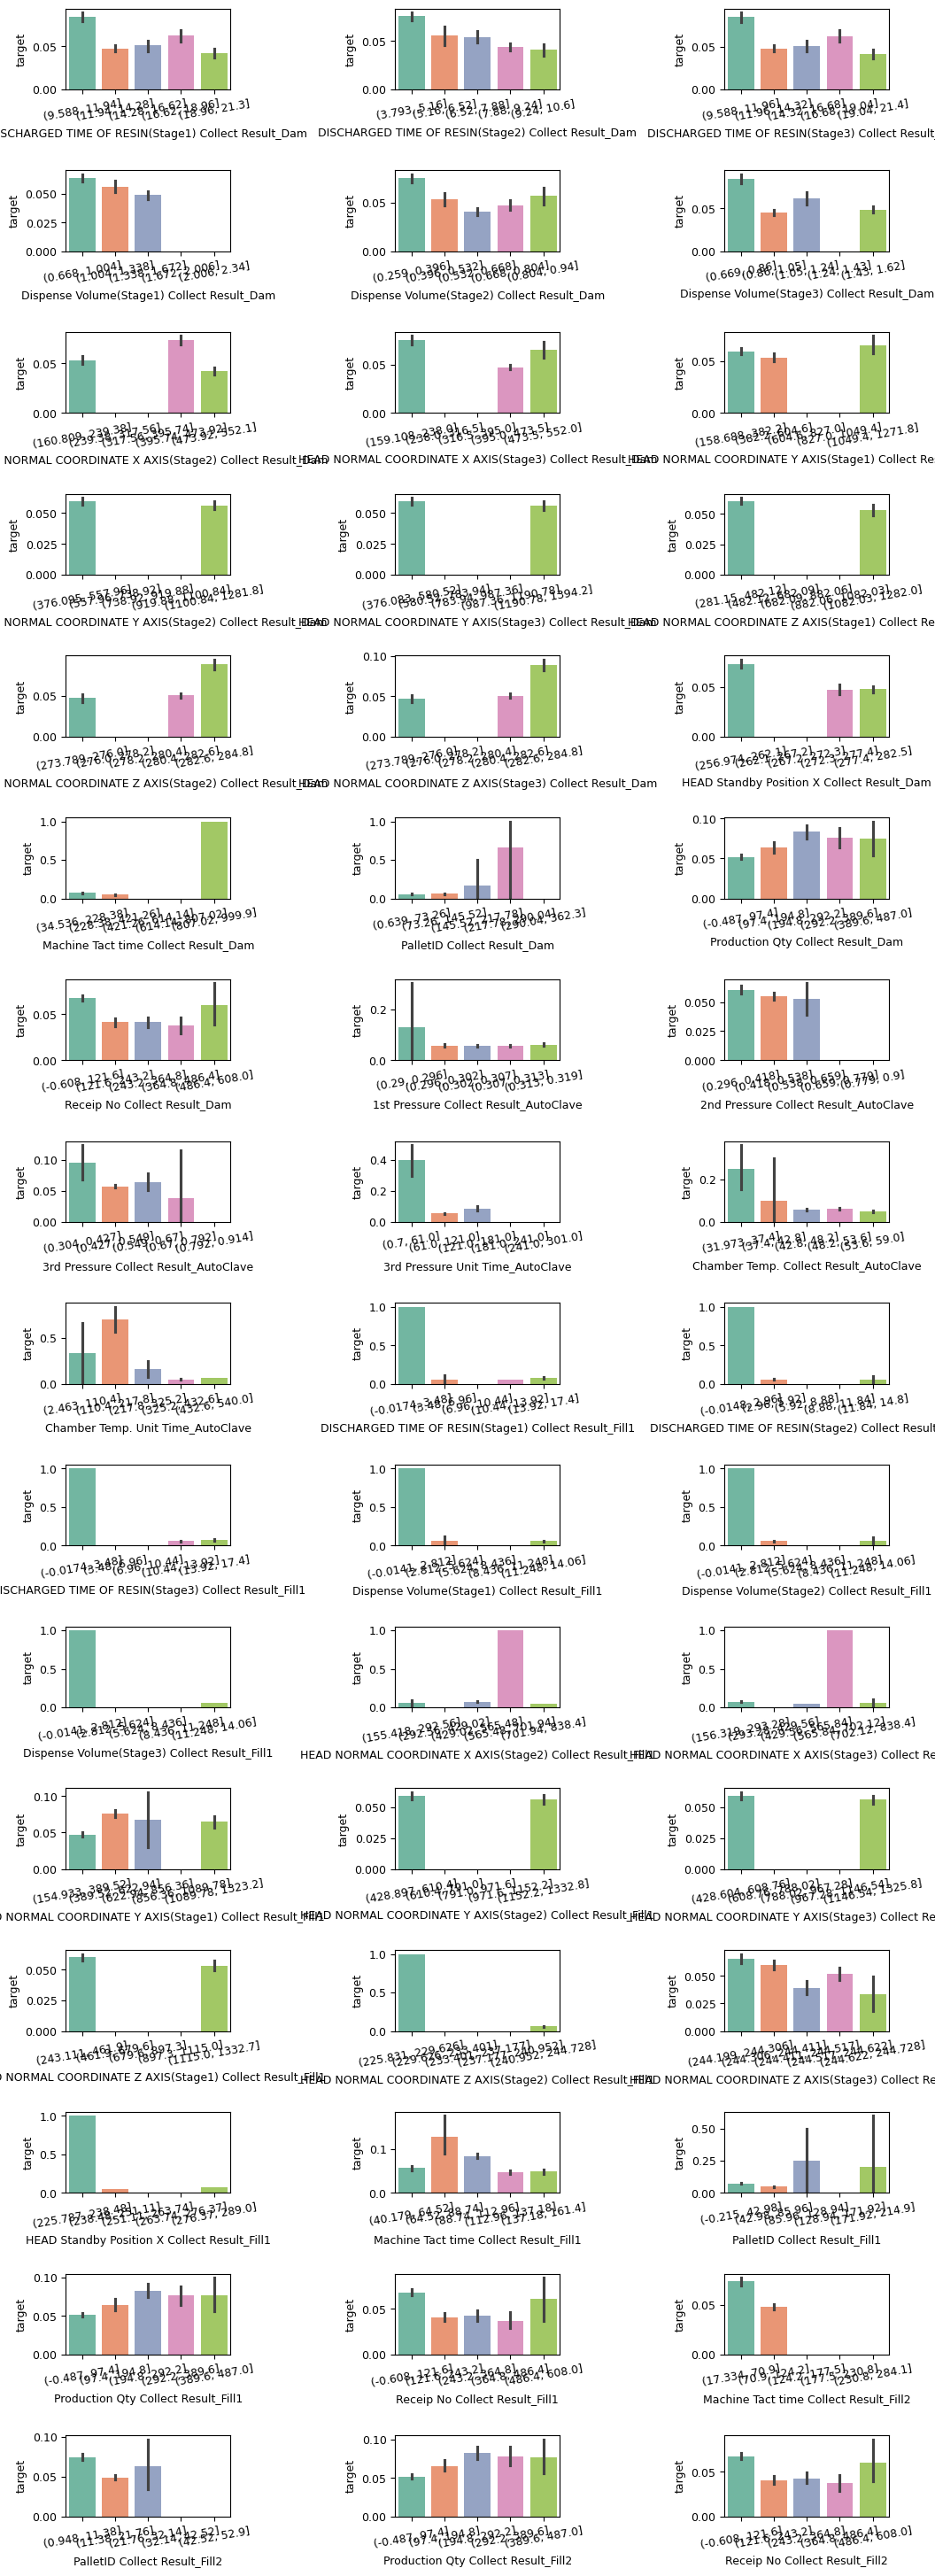

In [ ]:
cont_features = [col for col in train.columns if 10<train[col].nunique() and train[col].dtype !="object"]
plt.figure(figsize=(12, 70))                # Figure 크기 설정
grid = gridspec.GridSpec(30, 3)              # GridSpec 객체 생성
plt.subplots_adjust(wspace=1, hspace=1) # 서브플롯 간 여백 설정

for idx, cont_feature in enumerate(cont_features):
    # 값을 5개 구간으로 나누기
    tr[cont_feature] = pd.cut(tr[cont_feature], 5)

    ax = plt.subplot(grid[idx])                # 분포도를 그릴 서브플롯 설정
    sns.barplot(x=cont_feature, y='target', data=tr, palette='Set2', ax=ax)
    ax.tick_params(axis='x', labelrotation=10) # x축 라벨 회전

In [ ]:
resumetable(train)

Dataset Shape: (40506, 162)


Name   dtypes  Missing  \
0                                        Equipment_Dam   object        0   
1                                     Model.Suffix_Dam   object        0   
2                                        Workorder_Dam   object        0   
3               CURE END POSITION X Collect Result_Dam  float64        0   
4               CURE END POSITION Z Collect Result_Dam  float64        0   
5               CURE END POSITION Θ Collect Result_Dam    int64        0   
6                        CURE SPEED Collect Result_Dam    int64        0   
7             CURE START POSITION X Collect Result_Dam    int64        0   
8             CURE START POSITION Θ Collect Result_Dam    int64        0   
9         DISCHARGED SPEED OF RESIN Collect Result_Dam    int64        0   
10   DISCHARGED TIME OF RESIN(Stage1) Collect Resul...  float64        0   
11   DISCHARGED TIME OF RESIN(Stage2) Collect Resul...  float64        0   
12   DISCHARGED TIME OF RESIN(Stage3) Collect Resul...  float64        0   
13          Dispense Volume(Stage1) Collect Result_Dam  float64        0   
14          Dispense Volume(Stage2) Collect Result_Dam  float64        0   
15          Dispense Volume(Stage3) Collect Result_Dam  float64        0   
16   HEAD NORMAL COORDINATE X AXIS(Stage1) Collect ...   object        0   
17   HEAD NORMAL COORDINATE X AXIS(Stage2) Collect ...  float64        0   
18   HEAD NORMAL COORDINATE X AXIS(Stage3) Collect ...  float64        0   
19   HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect ...  float64        0   
20   HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect ...  float64        0   
21   HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect ...  float64        0   
22   HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect ...  float64        0   
23   HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect ...  float64        0   
24   HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect ...  float64        0   
25          HEAD Standby Position X Collect Result_Dam  float64        0   
26          HEAD Standby Position Y Collect Result_Dam    int64        0   
27          HEAD Standby Position Z Collect Result_Dam    int64        0   
28            Head Clean Position X Collect Result_Dam  float64        0   
29            Head Clean Position Y Collect Result_Dam  float64        0   
30            Head Clean Position Z Collect Result_Dam  float64        0   
31            Head Purge Position X Collect Result_Dam  float64        0   
32            Head Purge Position Y Collect Result_Dam    int64        0   
33            Head Purge Position Z Collect Result_Dam  float64        0   
34             Head Zero Position X Collect Result_Dam  float64        0   
35             Head Zero Position Y Collect Result_Dam  float64        0   
36             Head Zero Position Z Collect Result_Dam  float64        0   
37                Machine Tact time Collect Result_Dam  float64        0   
38                         PalletID Collect Result_Dam  float64        0   
39                   Production Qty Collect Result_Dam    int64        0   
40                        Receip No Collect Result_Dam    int64        0   
41    Stage1 Circle1 Distance Speed Collect Result_Dam    int64        0   
42    Stage1 Circle2 Distance Speed Collect Result_Dam    int64        0   
43    Stage1 Circle3 Distance Speed Collect Result_Dam    int64        0   
44    Stage1 Circle4 Distance Speed Collect Result_Dam    int64        0   
45      Stage1 Line1 Distance Speed Collect Result_Dam    int64        0   
46      Stage1 Line2 Distance Speed Collect Result_Dam    int64        0   
47      Stage1 Line3 Distance Speed Collect Result_Dam    int64        0   
48      Stage1 Line4 Distance Speed Collect Result_Dam    int64        0   
49    Stage2 Circle1 Distance Speed Collect Result_Dam    int64        0   
50    Stage2 Circle2 Distance Speed Collect Result_Dam    int64        0   
51    Stage2 Circle3 Distance Speed Collect Result_Dam    int64        0   
52    Stage2 Circle4 D